In [227]:
from cropnet.data_downloader import DataDownloader
import os
from herbie import Herbie
from datetime import datetime

# Use the "target_dir" to specify where the data should be downloaded to
downloader = DataDownloader(target_dir="./data")

# Download 2022 USDA Soybean data
# Note that most of the 2023 USDA data are not yet available
downloader.download_USDA("Soybean", fips_codes=["10003", "22007"], years=["2022"])

# Download the 2023 (the 1st and 2nd quarters) Sentinel-2 Imagery
downloader.download_Sentinel2(fips_codes=["10003", "22007"], years=["2023"], image_type="AG")
downloader.download_Sentinel2(fips_codes=["10003", "22007"], years=["2023"], image_type="NDVI")


# --- CONFIG ---
fips_codes = {
    "10003": "DE",  # Delaware - New Castle
    "22007": "LA",  # Louisiana - Assumption
}
date = "2023-01-01"
forecast_hour = "f00"  # Initial forecast only

# --- MAIN ---
for fips, state in fips_codes.items():
    output_dir = f"data/HRRR/realtime_wrf/2023/20230101"

    # Forecast times: 00 UTC to 23 UTC
    for hour in range(24):
        run_time = datetime.strptime(f"{date} {hour:02d}", "%Y-%m-%d %H")

        # Initialize Herbie
        H = Herbie(
            date=run_time,
            model="hrrr",
            product="sfc",
            fxx=0,  # f00 forecast
            save_dir=output_dir,
            verbose=True,
        )

        # Define output filename
        filename = f"hrrr.{date.replace('-', '')}.{hour:02d}.00.grib2"
        file_path = os.path.join(output_dir, filename)

        # Skip if file exists
        if os.path.exists(file_path):
            print(f"✅ File exists, skipping: {file_path}")
            continue

        # Download the file
        try:
            # Download and get the original file path
            downloaded_file = H.download()

            if downloaded_file and os.path.exists(downloaded_file):
                final_path = os.path.join(output_dir, f"hrrr.{run_time:%Y%m%d}.{run_time:%H}.00.grib2")
                os.rename(downloaded_file, final_path)
                print(f"✅ Renamed: {downloaded_file} -> {final_path}")
            else:
                print(f"⚠️ File not found after download: {downloaded_file}")
        except Exception as e:
            print(f"❌ Failed at {file_path}: {e}")



Progress: [ 1/1 ], Downloading USDA Data, Year: 2022, Crop: Soybean


KeyboardInterrupt: 

In [ ]:
# Use the "base_fir" to specify where the CropNet data is stored
retriever = DataRetriever(base_dir="/mnt/data/CropNet")
   
# Retrieve the 2022 USDA Soybean data
usda_data = retriever.retrieve_USDA(crop_type="Soybean", fips_codes=["10003", "22007"], years=["2022"])
   
# Retrieve the 2022 Sentinel-2 Imagery data
sentinel2_data = retriever.retrieve_Sentinel2(fips_codes=["10003", "22007"], years=["2022"], image_type="AG")
sentinel2_data = retriever.retrieve_Sentinel2(fips_codes=["10003", "22007"], years=["2022"], image_type="NDVI")
   
# Retrieve the 2022 WRF-HRRR data
hrrr_data = retriever.retrieve_HRRR(fips_codes=["10003","22007"], years=["2022"])

NameError: name 'DataRetriever' is not defined

In [109]:
import pandas as pd

# Read the USDA Corn County 2022 data
usda_corn_path = '/Users/RavenMott1/Downloads/Cropnet/data/USDA Crop Dataset/data/Corn/2022/USDA_Corn_County_2022.csv'
usda_corn_df = pd.read_csv(usda_corn_path)

# List of HRRR monthly file paths for AL, 2022
hrrr_month_paths = [
    '/Users/RavenMott1/Downloads/Cropnet/data/New Folder With Items/WRF-HRRR Computed Dataset 14/data/2022/AL/HRRR_01_AL_2022-01.csv',
    '/Users/RavenMott1/Downloads/Cropnet/data/New Folder With Items/WRF-HRRR Computed Dataset 14/data/2022/AL/HRRR_01_AL_2022-02.csv',
    '/Users/RavenMott1/Downloads/Cropnet/data/New Folder With Items/WRF-HRRR Computed Dataset 7/data/2022/AL/HRRR_01_AL_2022-03.csv',
    '/Users/RavenMott1/Downloads/Cropnet/data/New Folder With Items/WRF-HRRR Computed Dataset 14/data/2022/AL/HRRR_01_AL_2022-04.csv',
    '/Users/RavenMott1/Downloads/Cropnet/data/New Folder With Items/WRF-HRRR Computed Dataset 14/data/2022/AL/HRRR_01_AL_2022-05.csv',
    '/Users/RavenMott1/Downloads/Cropnet/data/New Folder With Items/WRF-HRRR Computed Dataset 14/data/2022/AL/HRRR_01_AL_2022-06.csv',
    '/Users/RavenMott1/Downloads/Cropnet/data/New Folder With Items/WRF-HRRR Computed Dataset 14/data/2022/AL/HRRR_01_AL_2022-07.csv',
    '/Users/RavenMott1/Downloads/Cropnet/data/New Folder With Items/WRF-HRRR Computed Dataset 14/data/2022/AL/HRRR_01_AL_2022-08.csv',
    '/Users/RavenMott1/Downloads/Cropnet/data/New Folder With Items/WRF-HRRR Computed Dataset 14/data/2022/AL/HRRR_01_AL_2022-09.csv',
    '/Users/RavenMott1/Downloads/Cropnet/data/New Folder With Items/WRF-HRRR Computed Dataset 14/data/2022/AL/HRRR_01_AL_2022-10.csv',
    '/Users/RavenMott1/Downloads/Cropnet/data/New Folder With Items/WRF-HRRR Computed Dataset 14/data/2022/AL/HRRR_01_AL_2022-11.csv',
    '/Users/RavenMott1/Downloads/Cropnet/data/New Folder With Items/WRF-HRRR Computed Dataset 14/data/2022/AL/HRRR_01_AL_2022-12.csv'
]

# Read each monthly file into a DataFrame and combine them
hrrr_monthly_dfs = [pd.read_csv(path) for path in hrrr_month_paths]
hrrr_all_year_df = pd.concat(hrrr_monthly_dfs, ignore_index=True)









In [110]:
usda_corn_df.head()


commodity_desc reference_period_desc  year  state_ansi state_name  \
0           CORN                  YEAR  2022           1    ALABAMA   
1           CORN                  YEAR  2022           1    ALABAMA   
2           CORN                  YEAR  2022           1    ALABAMA   
3           CORN                  YEAR  2022           1    ALABAMA   
4           CORN                  YEAR  2022           1    ALABAMA   

   county_ansi county_name  asd_code                     asd_desc domain_desc  \
0            3     BALDWIN        50  COASTAL PLAINS & GULF COAST       TOTAL   
1            5     BARBOUR        60                    WIREGRASS       TOTAL   
2            9      BLOUNT        20   MOUNTAINS & EASTERN VALLEY       TOTAL   
3           15     CALHOUN        20   MOUNTAINS & EASTERN VALLEY       TOTAL   
4           19    CHEROKEE        20   MOUNTAINS & EASTERN VALLEY       TOTAL   

  source_desc agg_level_desc  PRODUCTION, MEASURED IN BU  \
0      SURVEY         COUNTY                   1020000.0   
1      SURVEY         COUNTY                    262000.0   
2      SURVEY         COUNTY                    242000.0   
3      SURVEY         COUNTY                    319000.0   
4      SURVEY         COUNTY                    633000.0   

   YIELD, MEASURED IN BU / ACRE  
0                         139.0  
1                         159.8  
2                         100.4  
3                         142.4  
4                         138.5

In [111]:
usda_corn_df.tail()

commodity_desc reference_period_desc  year  state_ansi state_name  \
1511           CORN                  YEAR  2022          55  WISCONSIN   
1512           CORN                  YEAR  2022          55  WISCONSIN   
1513           CORN                  YEAR  2022          55  WISCONSIN   
1514           CORN                  YEAR  2022          55  WISCONSIN   
1515           CORN                  YEAR  2022          55  WISCONSIN   

      county_ansi county_name  asd_code      asd_desc domain_desc source_desc  \
1511          133    WAUKESHA        90     SOUTHEAST       TOTAL      SURVEY   
1512          135     WAUPACA        50       CENTRAL       TOTAL      SURVEY   
1513          137    WAUSHARA        50       CENTRAL       TOTAL      SURVEY   
1514          139   WINNEBAGO        60  EAST CENTRAL       TOTAL      SURVEY   
1515          141        WOOD        50       CENTRAL       TOTAL      SURVEY   

     agg_level_desc  PRODUCTION, MEASURED IN BU  YIELD, MEASURED IN BU / ACRE  
1511         COUNTY                   3493000.0                         181.0  
1512         COUNTY                   6588000.0                         175.2  
1513         COUNTY                   5800000.0                         174.7  
1514         COUNTY                   5862000.0                         171.9  
1515         COUNTY                   4312000.0                         167.8

In [112]:
hrrr_all_year_df.head()


Year  Month  Day Daily/Monthly    State   County  FIPS Code  Grid Index  \
0  2022      1  1.0         Daily  ALABAMA  AUTAUGA       1001         0.0   
1  2022      1  2.0         Daily  ALABAMA  AUTAUGA       1001         0.0   
2  2022      1  3.0         Daily  ALABAMA  AUTAUGA       1001         0.0   
3  2022      1  4.0         Daily  ALABAMA  AUTAUGA       1001         0.0   
4  2022      1  5.0         Daily  ALABAMA  AUTAUGA       1001         0.0   

   Lat (llcrnr)  Lon (llcrnr)  ...  Max Temperature (K)  Min Temperature (K)  \
0     32.340803    -86.917595  ...              301.218              294.130   
1     32.340803    -86.917595  ...              297.836              286.795   
2     32.340803    -86.917595  ...              285.739              274.121   
3     32.340803    -86.917595  ...              285.378              272.304   
4     32.340803    -86.917595  ...              289.256              274.308   

   Precipitation (kg m**-2)  Relative Humidity (%)  Wind Gust (m s**-1)  \
0                     0.015                   78.8                9.299   
1                    44.044                   83.9                9.476   
2                    10.555                   81.6               11.557   
3                     0.000                   78.5                4.403   
4                     0.000                   83.3                2.393   

   Wind Speed (m s**-1)  U Component of Wind (m s**-1)  \
0                 6.181                          1.113   
1                 4.003                          1.462   
2                 9.861                          6.925   
3                 3.956                         -0.871   
4                 3.235                          0.656   

   V Component of Wind (m s**-1)  Downward Shortwave Radiation Flux (W m**-2)  \
0                          6.019                                       2717.9   
1                          2.034                                        234.9   
2                         -6.421                                        546.8   
3                         -1.211                                       3538.8   
4                          2.695                                       2874.2   

   Vapor Pressure Deficit (kPa)  
0                         0.680  
1                         0.429  
2                         0.142  
3                         0.210  
4                         0.220  

[5 rows x 23 columns]

In [113]:
hrrr_all_year_df.tail()

Year  Month  Day Daily/Monthly    State      County  FIPS Code  \
574579  2022     12  NaN       Monthly  ALABAMA  TUSCALOOSA       1125   
574580  2022     12  NaN       Monthly  ALABAMA      WALKER       1127   
574581  2022     12  NaN       Monthly  ALABAMA  WASHINGTON       1129   
574582  2022     12  NaN       Monthly  ALABAMA      WILCOX       1131   
574583  2022     12  NaN       Monthly  ALABAMA     WINSTON       1133   

        Grid Index  Lat (llcrnr)  Lon (llcrnr)  ...  Max Temperature (K)  \
574579         NaN           NaN           NaN  ...           288.185181   
574580         NaN           NaN           NaN  ...           287.240032   
574581         NaN           NaN           NaN  ...           290.631626   
574582         NaN           NaN           NaN  ...           289.999109   
574583         NaN           NaN           NaN  ...           285.928077   

        Min Temperature (K)  Precipitation (kg m**-2)  Relative Humidity (%)  \
574579           279.229789                  2.826740              72.746851   
574580           278.496918                  3.751461              74.763479   
574581           280.754182                  2.329830              75.409789   
574582           279.922981                  2.333949              74.402289   
574583           277.814700                  4.431048              76.342903   

        Wind Gust (m s**-1)  Wind Speed (m s**-1)  \
574579             5.961694              4.350012   
574580             5.758985              3.341762   
574581             5.289463              5.312858   
574582             5.376633              5.221529   
574583             6.173765              2.460526   

        U Component of Wind (m s**-1)  V Component of Wind (m s**-1)  \
574579                      -0.130550                       0.602714   
574580                      -0.018359                       0.416022   
574581                      -0.510805                      -0.242010   
574582                      -0.206868                       0.539279   
574583                       0.139326                       0.481694   

        Downward Shortwave Radiation Flux (W m**-2)  \
574579                                  2099.143088   
574580                                  1913.495507   
574581                                  2341.741046   
574582                                  2362.406139   
574583                                  1814.203548   

        Vapor Pressure Deficit (kPa)  
574579                      0.325164  
574580                      0.278380  
574581                      0.326270  
574582                      0.335264  
574583                      0.238365  

[5 rows x 23 columns]

In [114]:

print("Unique counties:", hrrr_all_year_df["County"].unique())
print("Number of unique counties:", hrrr_all_year_df["County"].nunique())

Unique counties: ['AUTAUGA' 'BALDWIN' 'BARBOUR' 'BIBB' 'BLOUNT' 'BULLOCK' 'BUTLER'
 'CALHOUN' 'CHAMBERS' 'CHEROKEE' 'CHILTON' 'CHOCTAW' 'CLARKE' 'CLAY'
 'CLEBURNE' 'COFFEE' 'COLBERT' 'CONECUH' 'COOSA' 'COVINGTON' 'CRENSHAW'
 'CULLMAN' 'DALE' 'DALLAS' 'DEKALB' 'ELMORE' 'ESCAMBIA' 'ETOWAH' 'FAYETTE'
 'FRANKLIN' 'GENEVA' 'GREENE' 'HALE' 'HENRY' 'HOUSTON' 'JACKSON'
 'JEFFERSON' 'LAMAR' 'LAUDERDALE' 'LAWRENCE' 'LEE' 'LIMESTONE' 'LOWNDES'
 'MACON' 'MADISON' 'MARENGO' 'MARION' 'MARSHALL' 'MOBILE' 'MONROE'
 'MONTGOMERY' 'MORGAN' 'PERRY' 'PICKENS' 'PIKE' 'RANDOLPH' 'RUSSELL'
 'SHELBY' 'ST. CLAIR' 'SUMTER' 'TALLADEGA' 'TALLAPOOSA' 'TUSCALOOSA'
 'WALKER' 'WASHINGTON' 'WILCOX' 'WINSTON']
Number of unique counties: 67


In [115]:
# Number of rows and columns
print("usda_corn_df shape:", usda_corn_df.shape)
print("hrrr_all_year_df shape:", hrrr_all_year_df.shape)

# Data types
print("\nusda_corn_df data types:\n", usda_corn_df.dtypes)
print("\nhrrr_all_year_df data types:\n", hrrr_all_year_df.dtypes)

# Check for missing values
print("\nusda_corn_df missing values:\n", usda_corn_df.isnull().sum())
print("\nhrrr_all_year_df missing values:\n", hrrr_all_year_df.isnull().sum())

# Quick summary of categorical and numerical columns
print("\nusda_corn_df categorical columns:", usda_corn_df.select_dtypes(include='object').columns.tolist())
print("usda_corn_df numerical columns:", usda_corn_df.select_dtypes(include=['number']).columns.tolist())

print("\nhrrr_all_year_df categorical columns:", hrrr_all_year_df.select_dtypes(include='object').columns.tolist())
print("hrrr_all_year_df numerical columns:", hrrr_all_year_df.select_dtypes(include=['number']).columns.tolist())


usda_corn_df shape: (1516, 14)
hrrr_all_year_df shape: (574584, 23)

usda_corn_df data types:
 commodity_desc                   object
reference_period_desc            object
year                              int64
state_ansi                        int64
state_name                       object
county_ansi                       int64
county_name                      object
asd_code                          int64
asd_desc                         object
domain_desc                      object
source_desc                      object
agg_level_desc                   object
PRODUCTION, MEASURED IN BU      float64
YIELD, MEASURED IN BU / ACRE    float64
dtype: object

hrrr_all_year_df data types:
 Year                                             int64
Month                                            int64
Day                                            float64
Daily/Monthly                                   object
State                                           object
County                   

In [116]:
# Data Cleaning and Standardization

# --- 1. Filter for Alabama ---
usda_corn_df = usda_corn_df[usda_corn_df["state_name"].str.upper() == "ALABAMA"]



# --- 3. Standardize county/state names (uppercase, no extra spaces) ---
def standardize_location_names(df, county_col="County", state_col="State"):
    if county_col in df.columns:
        df[county_col] = df[county_col].astype(str).str.strip().str.upper()
    if state_col in df.columns:
        df[state_col] = df[state_col].astype(str).str.strip().str.upper()
    return df

usda_corn_df = standardize_location_names(usda_corn_df, county_col="county_name", state_col="state_name")
hrrr_all_year_df= standardize_location_names(hrrr_all_year_df, county_col="County", state_col="State")

# --- 4. Convert temperature values from Kelvin to Celsius ---
temp_k_map = {
    "Avg Temperature (K)": "Avg Temperature (C)",
    "Max Temperature (K)": "Max Temperature (C)",
    "Min Temperature (K)": "Min Temperature (C)"
}
for k_col, c_col in temp_k_map.items():
    if k_col in hrrr_all_year_df.columns:
        hrrr_all_year_df[c_col] = hrrr_all_year_df[k_col] - 273.15 # Convert Kelvin to Celsius
        del hrrr_all_year_df[k_col]

# --- 5. Split daily and monthly data into separate DataFrames ---
is_monthly = hrrr_all_year_df["Daily/Monthly"].str.upper() == "MONTHLY"
hrrr_every_month_df = hrrr_all_year_df[is_monthly].reset_index(drop=True)
hrrr_all_year_df = hrrr_all_year_df[~is_monthly].reset_index(drop=True)

for df in [hrrr_all_year_df, hrrr_every_month_df]:
    if "Daily/Monthly" in df.columns:
        del df["Daily/Monthly"]

# Add "Date" column for daily data if year, month, day columns exist
if all(col in hrrr_all_year_df.columns for col in ["Year", "Month", "Day"]):
    hrrr_all_year_df["Date"] = pd.to_datetime(hrrr_all_year_df[["Year", "Month", "Day"]], errors="coerce")

# Add "Date" column for monthly data if year and month columns exist
if all(col in hrrr_every_month_df.columns for col in ["Year", "Month"]):
    hrrr_every_month_df["Date"] = pd.to_datetime(
        dict(
            year=hrrr_every_month_df["Year"],
            month=hrrr_every_month_df["Month"],
            day=1
        ),
        errors="coerce"
    )

# Group by State, County, and Date to keep daily granularity
hrrr_all_year_df = hrrr_all_year_df.groupby(["State", "County", "Date"], as_index=False).mean(numeric_only=True)

# FIPS column for usda_corn_df using state_ansi and county_ansi
usda_corn_df["FIPS"] = usda_corn_df["state_ansi"].astype(str).str.zfill(2) + usda_corn_df["county_ansi"].astype(str).str.zfill(3)
# Standardize FIPS codes in HRRR data to match USDA (5-digit, zero-padded string)
for df in [hrrr_all_year_df, hrrr_every_month_df]:
    if "FIPS Code" in df.columns:
        df["FIPS"] = df["FIPS Code"].astype(int).astype(str).str.zfill(5)

# --- 6. Remove unnecessary columns ---
remove_cols = [
    "Lat (llcrnr)", "Lon (llcrnr)", "Lat (urcrnr)", "Lon (urcrnr)",
    "Year", "Month", "Day", "Daily/Monthly", "state_ansi", "county_ansi",
    "FIPS Code", "Grid Index", "Grid Index (Monthly)"
]
for df in [hrrr_all_year_df, hrrr_every_month_df, usda_corn_df]:
    for col in remove_cols:
        if col in df.columns:
            del df[col]


In [117]:
usda_corn_df.head()

commodity_desc reference_period_desc  year state_name county_name  asd_code  \
0           CORN                  YEAR  2022    ALABAMA     BALDWIN        50   
1           CORN                  YEAR  2022    ALABAMA     BARBOUR        60   
2           CORN                  YEAR  2022    ALABAMA      BLOUNT        20   
3           CORN                  YEAR  2022    ALABAMA     CALHOUN        20   
4           CORN                  YEAR  2022    ALABAMA    CHEROKEE        20   

                      asd_desc domain_desc source_desc agg_level_desc  \
0  COASTAL PLAINS & GULF COAST       TOTAL      SURVEY         COUNTY   
1                    WIREGRASS       TOTAL      SURVEY         COUNTY   
2   MOUNTAINS & EASTERN VALLEY       TOTAL      SURVEY         COUNTY   
3   MOUNTAINS & EASTERN VALLEY       TOTAL      SURVEY         COUNTY   
4   MOUNTAINS & EASTERN VALLEY       TOTAL      SURVEY         COUNTY   

   PRODUCTION, MEASURED IN BU  YIELD, MEASURED IN BU / ACRE   FIPS  
0                   1020000.0                         139.0  01003  
1                    262000.0                         159.8  01005  
2                    242000.0                         100.4  01009  
3                    319000.0                         142.4  01015  
4                    633000.0                         138.5  01019

In [118]:
usda_corn_df.tail()

commodity_desc reference_period_desc  year state_name county_name  \
27           CORN                  YEAR  2022    ALABAMA       PERRY   
28           CORN                  YEAR  2022    ALABAMA    RANDOLPH   
29           CORN                  YEAR  2022    ALABAMA     RUSSELL   
30           CORN                  YEAR  2022    ALABAMA   TALLADEGA   
31           CORN                  YEAR  2022    ALABAMA  TUSCALOOSA   

    asd_code                 asd_desc domain_desc source_desc agg_level_desc  \
27        40               BLACK BELT       TOTAL      SURVEY         COUNTY   
28        30  UPPER PLAINS & PIEDMONT       TOTAL      SURVEY         COUNTY   
29        60                WIREGRASS       TOTAL      SURVEY         COUNTY   
30        30  UPPER PLAINS & PIEDMONT       TOTAL      SURVEY         COUNTY   
31        30  UPPER PLAINS & PIEDMONT       TOTAL      SURVEY         COUNTY   

    PRODUCTION, MEASURED IN BU  YIELD, MEASURED IN BU / ACRE   FIPS  
27                    434000.0                          68.0  01105  
28                    131500.0                         139.9  01111  
29                     60500.0                          99.2  01113  
30                    824000.0                         154.9  01121  
31                    256000.0                         120.8  01125

In [119]:
hrrr_all_year_df.head()

State   County       Date  Precipitation (kg m**-2)  \
0  ALABAMA  AUTAUGA 2022-01-01                  0.059533   
1  ALABAMA  AUTAUGA 2022-01-02                 39.259400   
2  ALABAMA  AUTAUGA 2022-01-03                  9.041000   
3  ALABAMA  AUTAUGA 2022-01-04                  0.000000   
4  ALABAMA  AUTAUGA 2022-01-05                  0.000000   

   Relative Humidity (%)  Wind Gust (m s**-1)  Wind Speed (m s**-1)  \
0              79.960000             9.857133              4.899000   
1              85.293333             9.312733              3.479667   
2              83.580000            11.858000              8.853067   
3              79.566667             5.126933              3.955267   
4              82.606667             2.826000              2.506533   

   U Component of Wind (m s**-1)  V Component of Wind (m s**-1)  \
0                       0.792800                       4.789800   
1                       0.991000                       1.738867   
2                       6.077667                      -5.822200   
3                      -0.940000                      -1.284133   
4                       0.393400                       2.080133   

   Downward Shortwave Radiation Flux (W m**-2)  Vapor Pressure Deficit (kPa)  \
0                                  2295.146667                      0.611533   
1                                   133.506667                      0.373400   
2                                   723.320000                      0.127133   
3                                  3618.586667                      0.185733   
4                                  3123.560000                      0.209800   

   Avg Temperature (C)  Max Temperature (C)  Min Temperature (C)   FIPS  
0            23.045200            27.026200            20.714200  01001  
1            19.398133            24.106600            14.366800  01001  
2             3.389400            13.730800             0.583800  01001  
3             2.955267            11.096467            -1.362067  01001  
4             7.253933            15.051667             1.555333  01001

In [120]:
hrrr_all_year_df.tail()

State   County       Date  Precipitation (kg m**-2)  \
24450  ALABAMA  WINSTON 2022-12-27                    0.0410   
24451  ALABAMA  WINSTON 2022-12-28                    0.0000   
24452  ALABAMA  WINSTON 2022-12-29                    0.0005   
24453  ALABAMA  WINSTON 2022-12-30                    4.9288   
24454  ALABAMA  WINSTON 2022-12-31                    2.9169   

       Relative Humidity (%)  Wind Gust (m s**-1)  Wind Speed (m s**-1)  \
24450                  60.73               2.9369                1.2523   
24451                  57.99               5.4309                2.3576   
24452                  54.37               7.7621                3.2297   
24453                  69.84               7.7498                2.9568   
24454                  90.05               5.3954                1.7232   

       U Component of Wind (m s**-1)  V Component of Wind (m s**-1)  \
24450                        -0.1579                         0.3555   
24451                        -0.8026                         1.9647   
24452                        -1.4674                         2.8359   
24453                        -1.7741                         2.2538   
24454                         0.2989                         1.3839   

       Downward Shortwave Radiation Flux (W m**-2)  \
24450                                      3500.11   
24451                                      3476.77   
24452                                      2927.08   
24453                                      1321.33   
24454                                      2035.42   

       Vapor Pressure Deficit (kPa)  Avg Temperature (C)  Max Temperature (C)  \
24450                        0.3125               1.4862               9.2741   
24451                        0.4240               3.6658              15.7081   
24452                        0.6962              12.5045              20.2341   
24453                        0.5042              14.5311              17.4595   
24454                        0.1916              15.2048              18.5266   

       Min Temperature (C)   FIPS  
24450              -4.3926  01133  
24451              -3.2121  01133  
24452               7.6635  01133  
24453              10.8967  01133  
24454              13.8078  01133

In [121]:
hrrr_every_month_df.head()

State   County  Precipitation (kg m**-2)  Relative Humidity (%)  \
0  ALABAMA  AUTAUGA                  3.830028              68.428817   
1  ALABAMA  BALDWIN                  1.841861              72.732998   
2  ALABAMA  BARBOUR                  2.799485              66.396344   
3  ALABAMA     BIBB                  4.264183              67.724395   
4  ALABAMA   BLOUNT                  3.703056              66.927074   

   Wind Gust (m s**-1)  Wind Speed (m s**-1)  U Component of Wind (m s**-1)  \
0             6.175469              4.755189                       0.429174   
1             6.853068              6.743207                       0.354913   
2             5.963249              4.273303                       0.557912   
3             6.401355              4.233808                       0.243683   
4             6.529457              3.103699                       0.424286   

   V Component of Wind (m s**-1)  Downward Shortwave Radiation Flux (W m**-2)  \
0                      -1.321458                                  2889.922151   
1                      -1.749422                                  3034.614490   
2                      -0.843831                                  3009.552258   
3                      -1.104087                                  2849.618750   
4                      -0.774506                                  2718.283641   

   Vapor Pressure Deficit (kPa)  Avg Temperature (C)  Max Temperature (C)  \
0                      0.355817             6.947680            14.001428   
1                      0.342061             9.283907            15.747453   
2                      0.417730             8.148353            15.404311   
3                      0.350008             6.504290            13.398339   
4                      0.318297             4.882684            11.411570   

   Min Temperature (C)       Date   FIPS  
0             1.938120 2022-01-01  01001  
1             4.303026 2022-01-01  01003  
2             2.615023 2022-01-01  01005  
3             1.634060 2022-01-01  01007  
4             0.300821 2022-01-01  01009

In [122]:
hrrr_every_month_df.tail()

State      County  Precipitation (kg m**-2)  Relative Humidity (%)  \
799  ALABAMA  TUSCALOOSA                  2.826740              72.746851   
800  ALABAMA      WALKER                  3.751461              74.763479   
801  ALABAMA  WASHINGTON                  2.329830              75.409789   
802  ALABAMA      WILCOX                  2.333949              74.402289   
803  ALABAMA     WINSTON                  4.431048              76.342903   

     Wind Gust (m s**-1)  Wind Speed (m s**-1)  U Component of Wind (m s**-1)  \
799             5.961694              4.350012                      -0.130550   
800             5.758985              3.341762                      -0.018359   
801             5.289463              5.312858                      -0.510805   
802             5.376633              5.221529                      -0.206868   
803             6.173765              2.460526                       0.139326   

     V Component of Wind (m s**-1)  \
799                       0.602714   
800                       0.416022   
801                      -0.242010   
802                       0.539279   
803                       0.481694   

     Downward Shortwave Radiation Flux (W m**-2)  \
799                                  2099.143088   
800                                  1913.495507   
801                                  2341.741046   
802                                  2362.406139   
803                                  1814.203548   

     Vapor Pressure Deficit (kPa)  Avg Temperature (C)  Max Temperature (C)  \
799                      0.325164             9.746571            15.035181   
800                      0.278380             8.949740            14.090032   
801                      0.326270            11.635430            17.481626   
802                      0.335264            10.938416            16.849109   
803                      0.238365             8.058665            12.778077   

     Min Temperature (C)       Date   FIPS  
799             6.079789 2022-12-01  01125  
800             5.346918 2022-12-01  01127  
801             7.604182 2022-12-01  01129  
802             6.772981 2022-12-01  01131  
803             4.664700 2022-12-01  01133

In [123]:
# Number of rows and columns
print("usda_corn_df shape:", usda_corn_df.shape)
print("hrrr_all_year_df shape:", hrrr_all_year_df.shape)
print("hrrr_every_month_df shape:", hrrr_every_month_df.shape)

# Data types
print("\nusda_corn_df data types:\n", usda_corn_df.dtypes)
print("\nhrrr_all_year_df data types:\n", hrrr_all_year_df.dtypes)
print("\nhrrr_every_month_df data types:\n", hrrr_every_month_df.dtypes)

# Check for missing values
print("\nusda_corn_df missing values:\n", usda_corn_df.isnull().sum())
print("\nhrrr_all_year_df missing values:\n", hrrr_all_year_df.isnull().sum())
print("\nhrrr_every_month_df missing values:\n", hrrr_every_month_df.isnull().sum())

# Quick summary of categorical and numerical columns
print("\nusda_corn_df categorical columns:", usda_corn_df.select_dtypes(include='object').columns.tolist())
print("usda_corn_df numerical columns:", usda_corn_df.select_dtypes(include=['number']).columns.tolist())

print("\nhrrr_all_year_df categorical columns:", hrrr_all_year_df.select_dtypes(include='object').columns.tolist())
print("hrrr_all_year_df numerical columns:", hrrr_all_year_df.select_dtypes(include=['number']).columns.tolist())

print("\nhrrr_every_month_df categorical columns:", hrrr_every_month_df.select_dtypes(include='object').columns.tolist())
print("hrrr_every_month_df numerical columns:", hrrr_every_month_df.select_dtypes(include=['number']).columns.tolist())

usda_corn_df shape: (32, 13)
hrrr_all_year_df shape: (24455, 15)
hrrr_every_month_df shape: (804, 15)

usda_corn_df data types:
 commodity_desc                   object
reference_period_desc            object
year                              int64
state_name                       object
county_name                      object
asd_code                          int64
asd_desc                         object
domain_desc                      object
source_desc                      object
agg_level_desc                   object
PRODUCTION, MEASURED IN BU      float64
YIELD, MEASURED IN BU / ACRE    float64
FIPS                             object
dtype: object

hrrr_all_year_df data types:
 State                                                  object
County                                                 object
Date                                           datetime64[ns]
Precipitation (kg m**-2)                              float64
Relative Humidity (%)                                 floa

In [124]:
print("Unique counties in usda_corn_df:", usda_corn_df["county_name"].unique())
print("Number of unique counties in usda_corn_df:", usda_corn_df["county_name"].nunique())

print("\nUnique counties in hrrr_all_year_df:", hrrr_all_year_df["County"].unique())
print("Number of unique counties in hrrr_all_year_df:", hrrr_all_year_df["County"].nunique())

print("\nUnique counties in  hrrr_every_month_df:", hrrr_every_month_df["County"].unique())
print("Number of unique counties in  hrrr_every_month_df:", hrrr_every_month_df["County"].nunique())

print("\nAll unique FIPS codes in hrrr_all_year_df and corresponding counties:")
fips_county = hrrr_all_year_df.drop_duplicates("FIPS")[["FIPS", "County"]]
for _, row in fips_county.iterrows():
    print(f"{row['FIPS']}: {row['County']}")
print("Number of unique FIPS codes in hrrr_all_year_df:", hrrr_all_year_df["FIPS"].nunique())

Unique counties in usda_corn_df: ['BALDWIN' 'BARBOUR' 'BLOUNT' 'CALHOUN' 'CHEROKEE' 'CHILTON' 'COFFEE'
 'COLBERT' 'CULLMAN' 'DALE' 'DALLAS' 'DE KALB' 'ESCAMBIA' 'ETOWAH'
 'FAYETTE' 'HENRY' 'HOUSTON' 'JACKSON' 'LAUDERDALE' 'LAWRENCE' 'LIMESTONE'
 'MADISON' 'MARENGO' 'MARION' 'MARSHALL' 'MONROE' 'MORGAN' 'PERRY'
 'RANDOLPH' 'RUSSELL' 'TALLADEGA' 'TUSCALOOSA']
Number of unique counties in usda_corn_df: 32

Unique counties in hrrr_all_year_df: ['AUTAUGA' 'BALDWIN' 'BARBOUR' 'BIBB' 'BLOUNT' 'BULLOCK' 'BUTLER'
 'CALHOUN' 'CHAMBERS' 'CHEROKEE' 'CHILTON' 'CHOCTAW' 'CLARKE' 'CLAY'
 'CLEBURNE' 'COFFEE' 'COLBERT' 'CONECUH' 'COOSA' 'COVINGTON' 'CRENSHAW'
 'CULLMAN' 'DALE' 'DALLAS' 'DEKALB' 'ELMORE' 'ESCAMBIA' 'ETOWAH' 'FAYETTE'
 'FRANKLIN' 'GENEVA' 'GREENE' 'HALE' 'HENRY' 'HOUSTON' 'JACKSON'
 'JEFFERSON' 'LAMAR' 'LAUDERDALE' 'LAWRENCE' 'LEE' 'LIMESTONE' 'LOWNDES'
 'MACON' 'MADISON' 'MARENGO' 'MARION' 'MARSHALL' 'MOBILE' 'MONROE'
 'MONTGOMERY' 'MORGAN' 'PERRY' 'PICKENS' 'PIKE' 'RANDOLPH' 'RUSSELL'


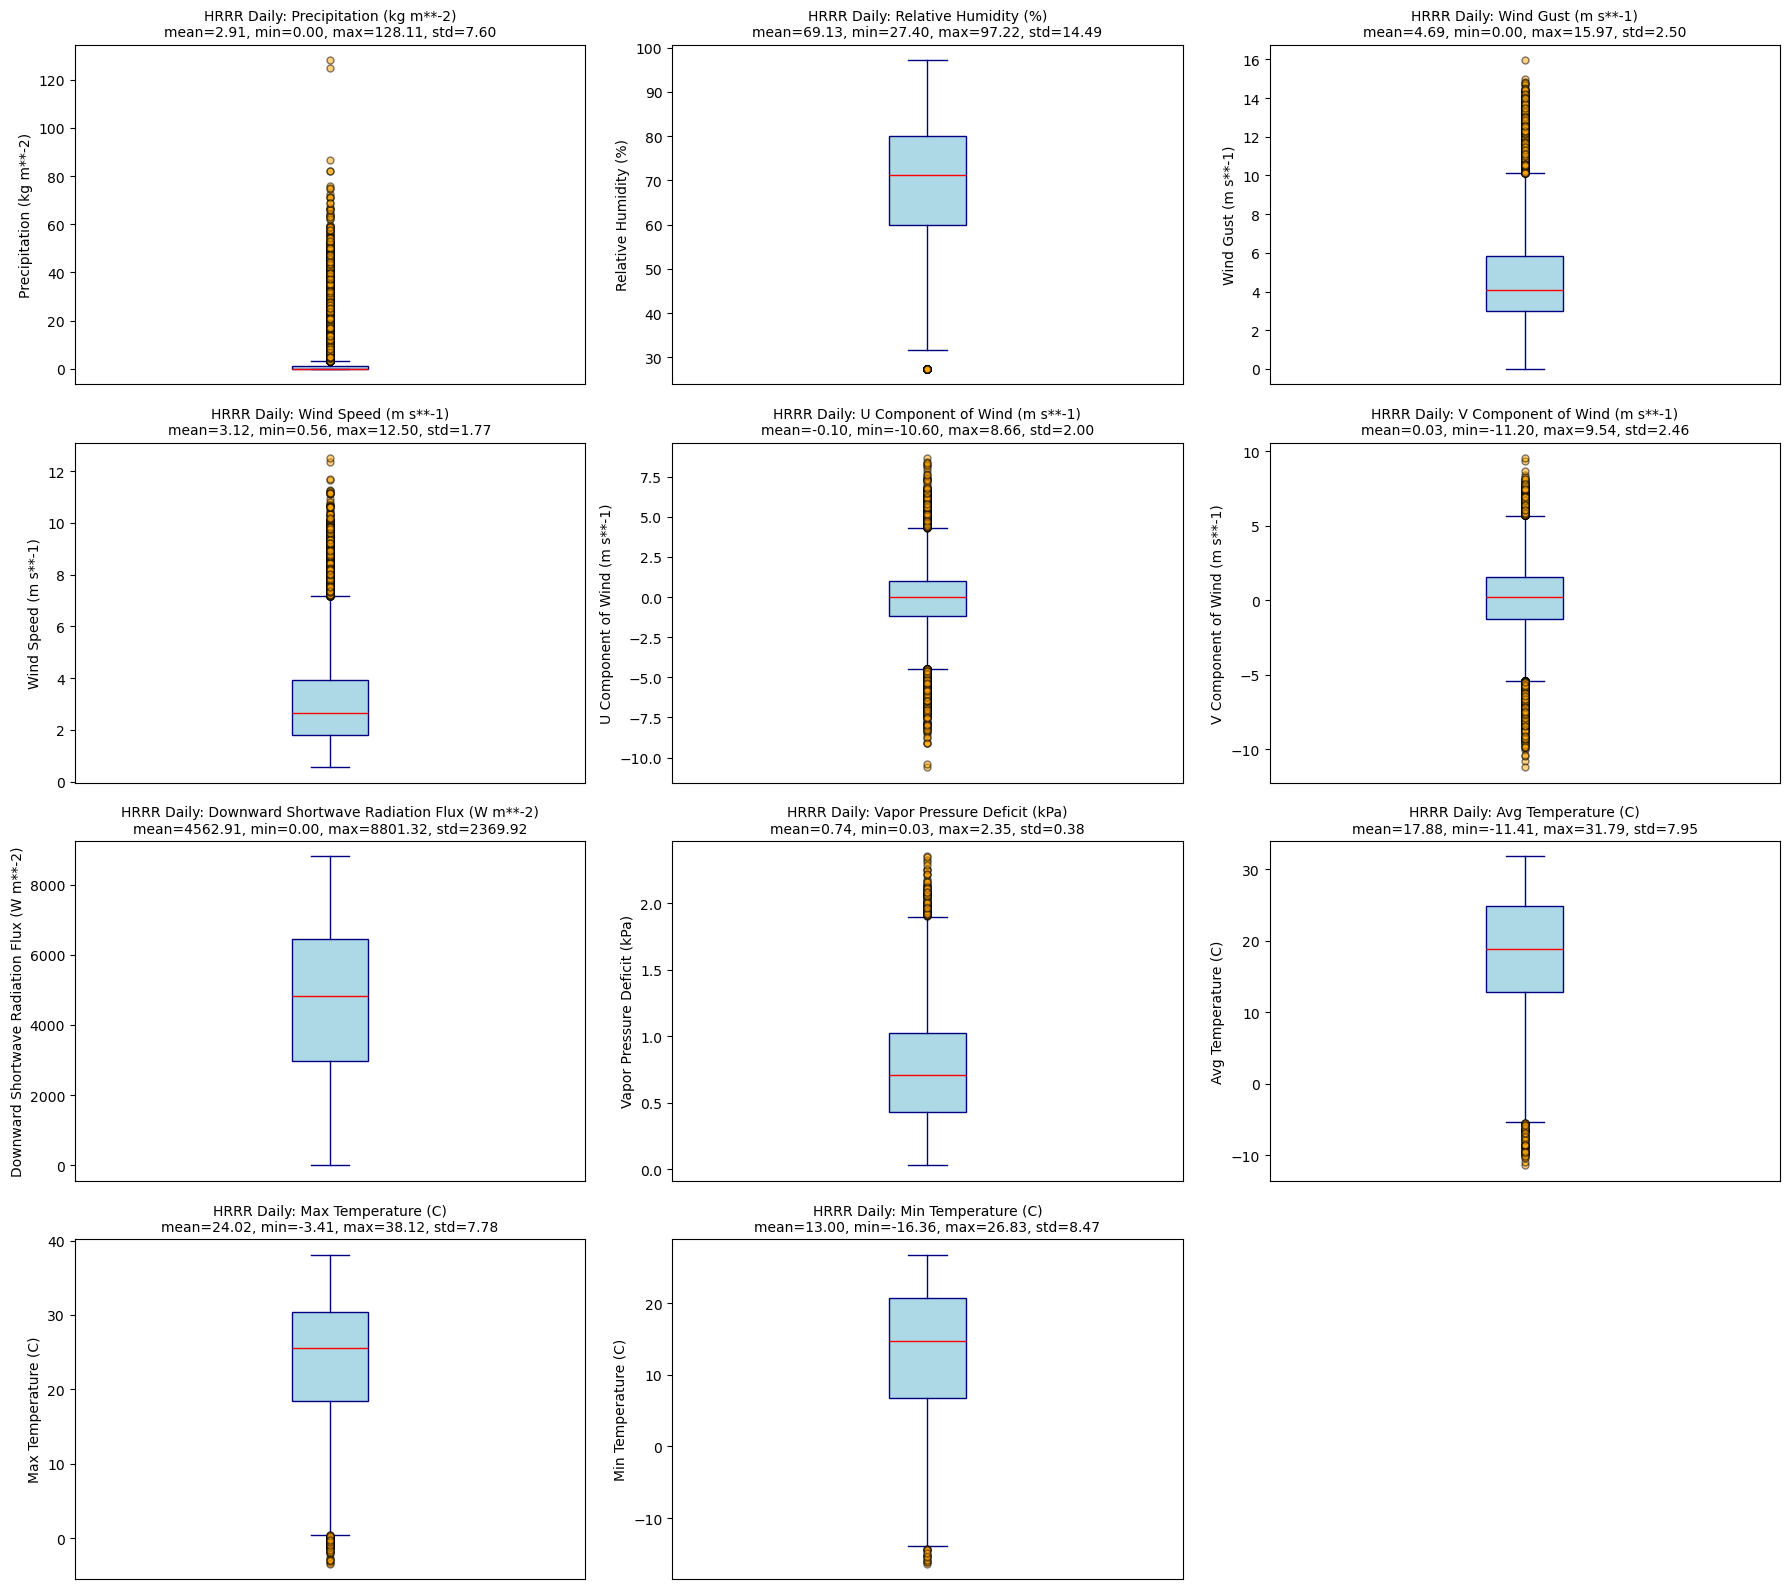

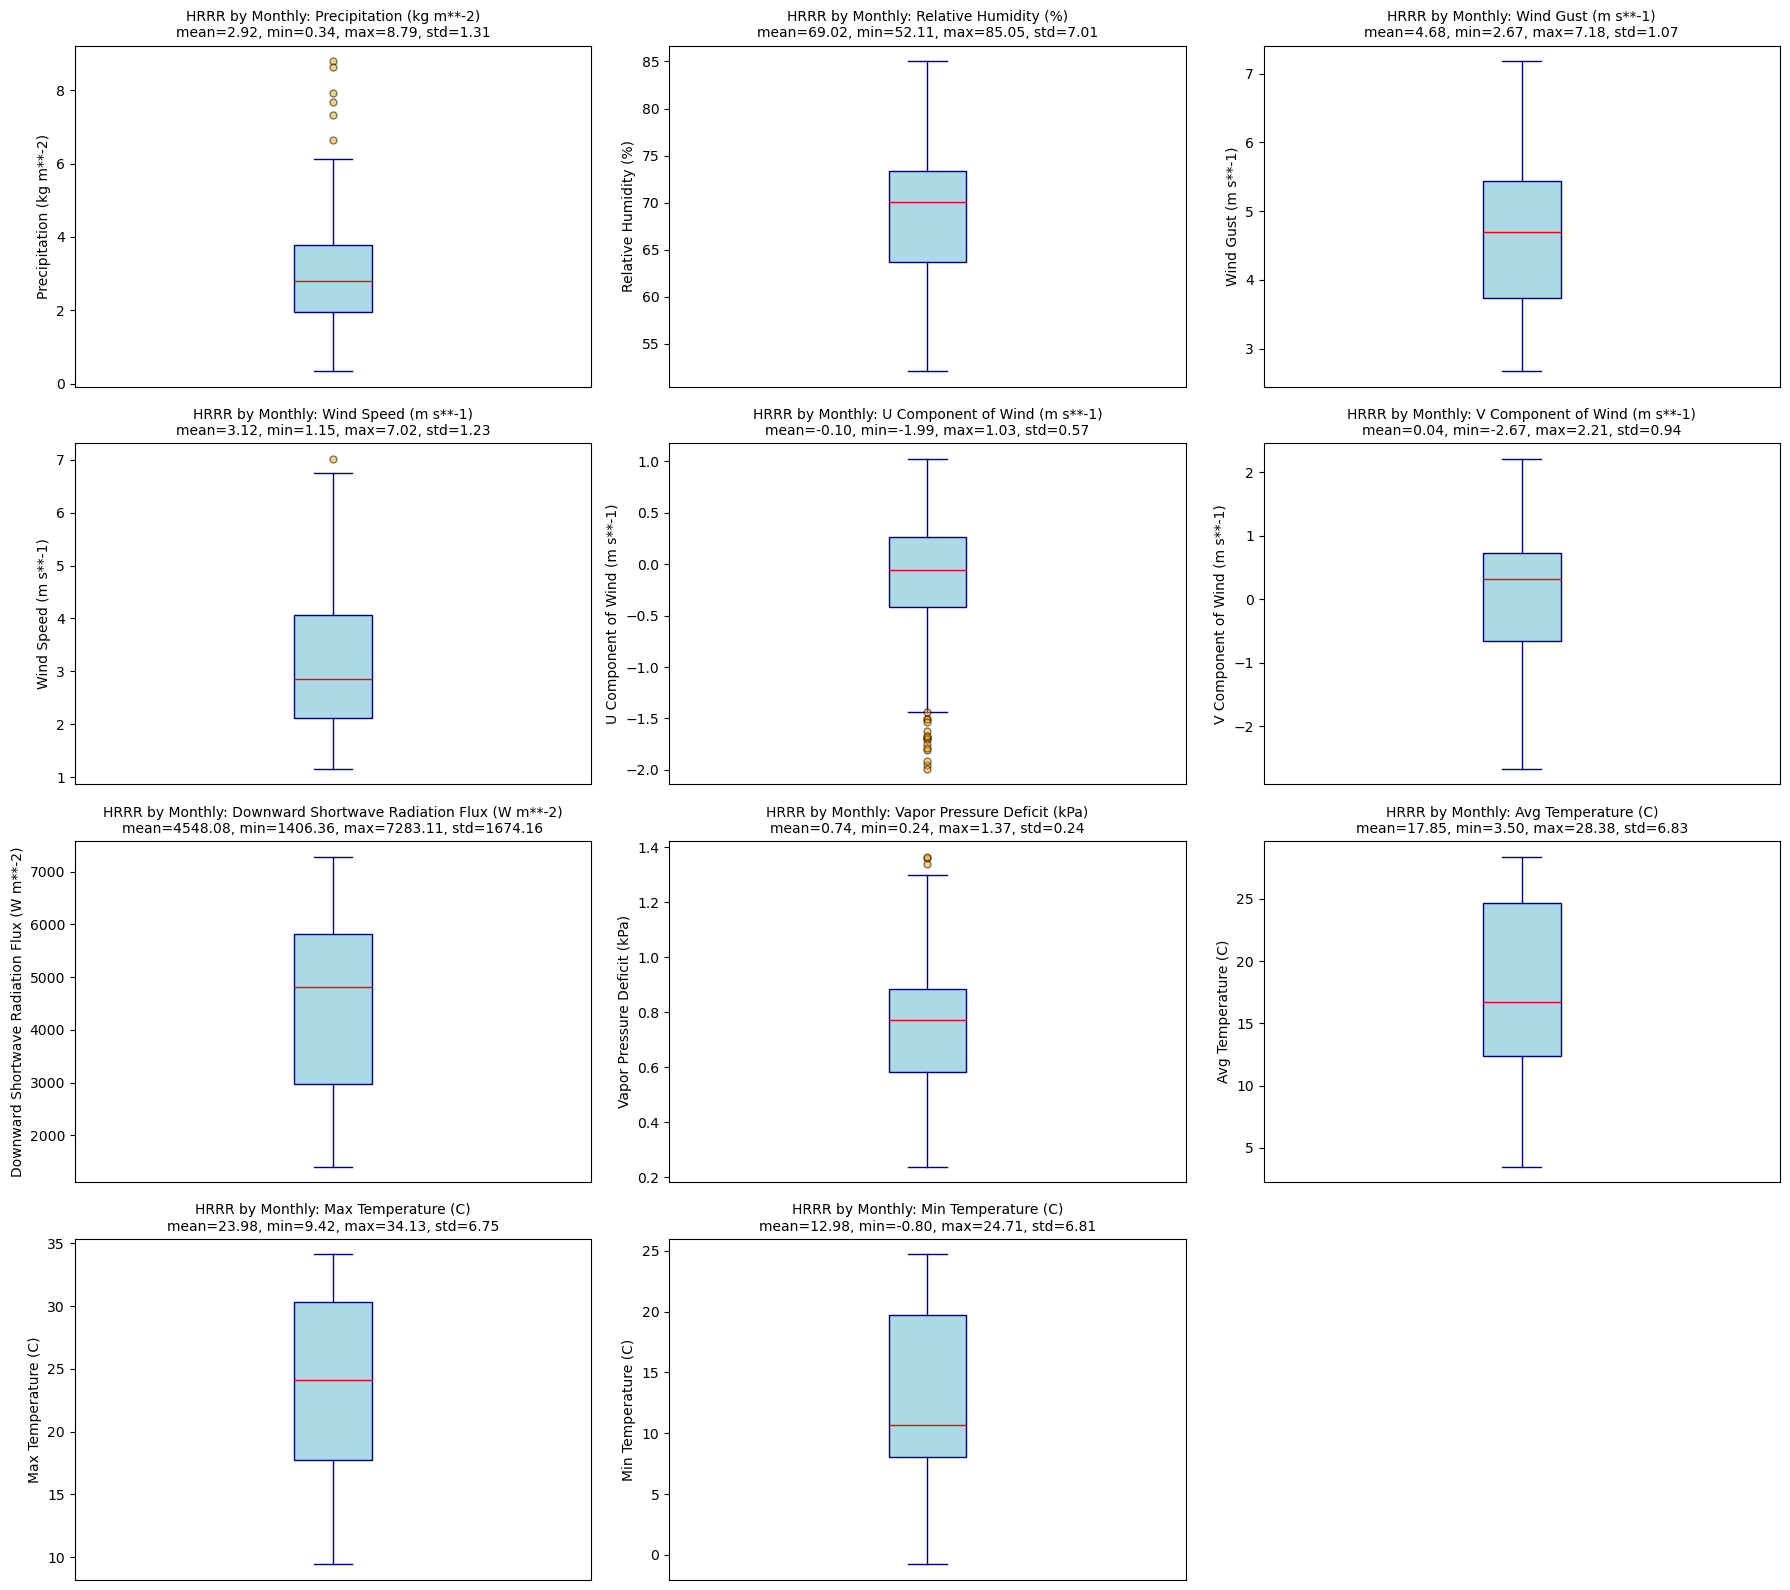

In [125]:
import matplotlib.pyplot as plt
import numpy as np

cols_to_plot = ['Precipitation (kg m**-2)', 'Relative Humidity (%)', 'Wind Gust (m s**-1)', 'Wind Speed (m s**-1)', 'U Component of Wind (m s**-1)', 'V Component of Wind (m s**-1)', 'Downward Shortwave Radiation Flux (W m**-2)', 'Vapor Pressure Deficit (kPa)', 'Avg Temperature (C)', 'Max Temperature (C)', 'Min Temperature (C)']
def plot_boxplots_stats(df, title_prefix):
    n_cols = 3
    n_rows = int(np.ceil(len(cols_to_plot) / n_cols))
    plt.figure(figsize=(n_cols * 6, n_rows * 4))
    for i, col in enumerate(cols_to_plot, 1):
        plt.subplot(n_rows, n_cols, i)
        data = df[col].dropna()
        plt.boxplot(data, vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightblue', color='navy'),
                    medianprops=dict(color='red'),
                    whiskerprops=dict(color='navy'),
                    capprops=dict(color='navy'),
                    flierprops=dict(markerfacecolor='orange', marker='o', markersize=5, alpha=0.5))
        stats = f"mean={data.mean():.2f}, min={data.min():.2f}, max={data.max():.2f}, std={data.std():.2f}"
        plt.title(f"{title_prefix}: {col}\n{stats}", fontsize=10)
        plt.ylabel(col)
        plt.xticks([])
    plt.tight_layout()
    plt.show()

plot_boxplots_stats(hrrr_all_year_df, "HRRR Daily")
plot_boxplots_stats(hrrr_every_month_df, "HRRR by Monthly")

          Date      County  Max Temperature (C)
0   2022-01-01     LOWNDES            28.021850
1   2022-01-02        DALE            26.194083
2   2022-01-03     HOUSTON            19.953833
3   2022-01-04     RUSSELL            14.176400
4   2022-01-05      GENEVA            18.294429
..         ...         ...                  ...
360 2022-12-27  WASHINGTON            14.792172
361 2022-12-28     CHOCTAW            18.910462
362 2022-12-29      WILCOX            23.778129
363 2022-12-30     HOUSTON            23.198833
364 2022-12-31     HOUSTON            22.626167

[365 rows x 3 columns]


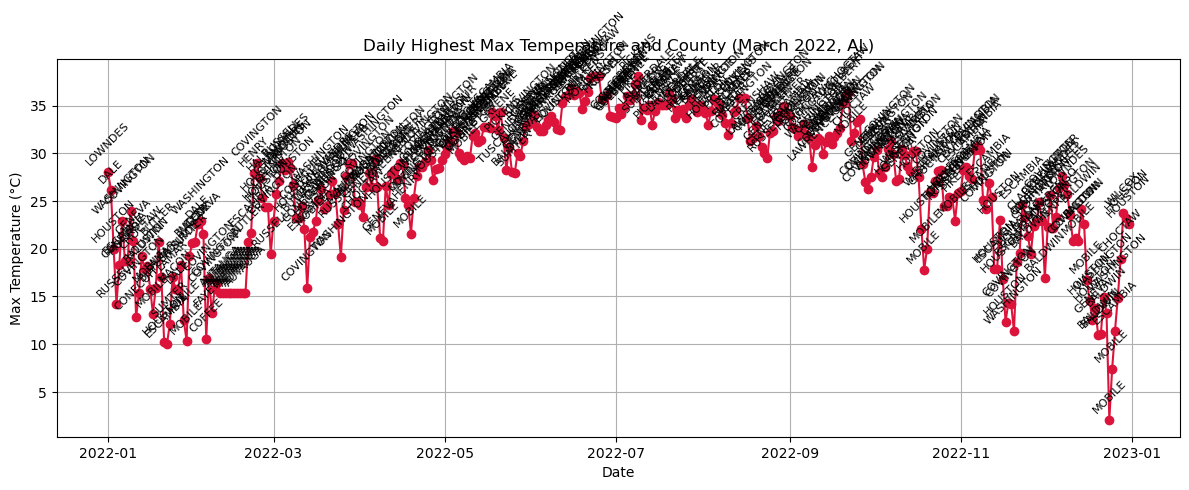

          Date      County  Precipitation (kg m**-2)
0   2022-01-01  LAUDERDALE                 17.014950
1   2022-01-02      MORGAN                 41.730933
2   2022-01-03      DEKALB                 23.318034
3   2022-01-04  TUSCALOOSA                  0.001238
4   2022-01-05     HOUSTON                  0.008417
..         ...         ...                       ...
360 2022-12-27     JACKSON                  0.100629
361 2022-12-28     BALDWIN                  0.021426
362 2022-12-29  LAUDERDALE                  0.157600
363 2022-12-30      MOBILE                 34.111467
364 2022-12-31      GENEVA                 14.530714

[365 rows x 3 columns]


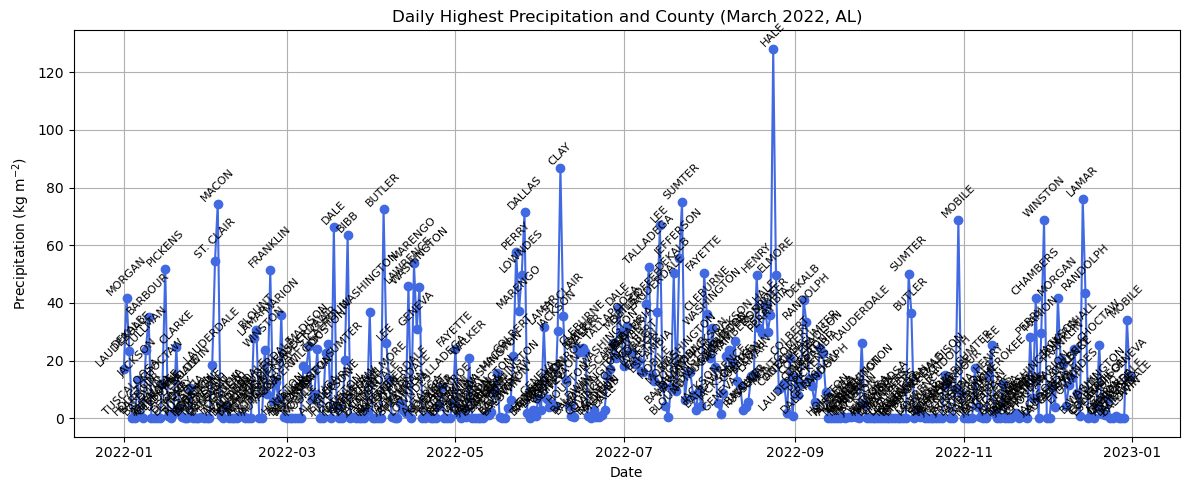

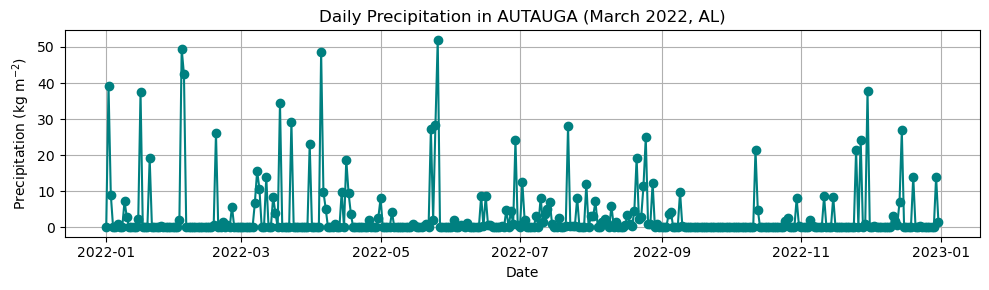

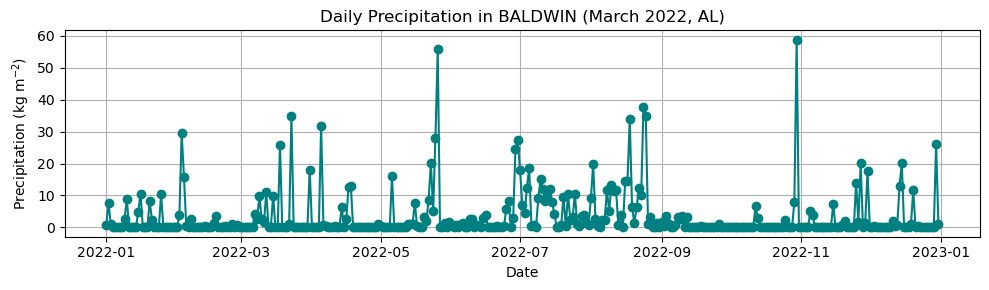

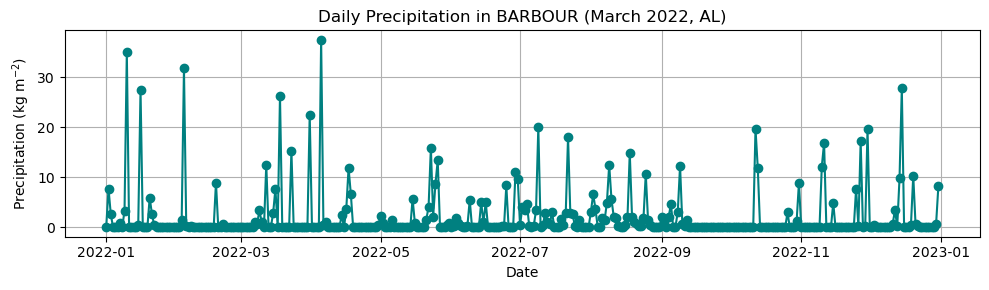

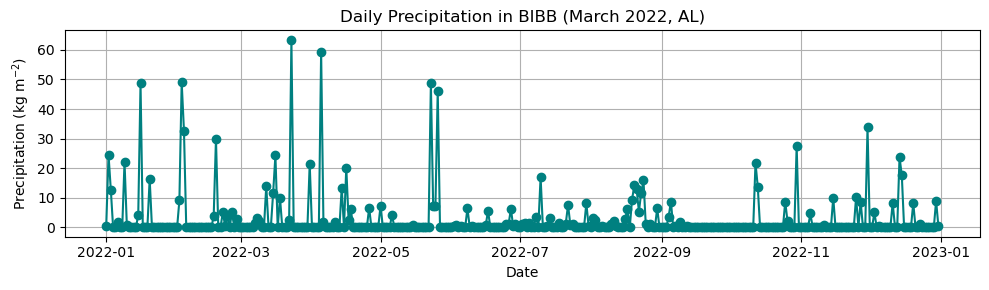

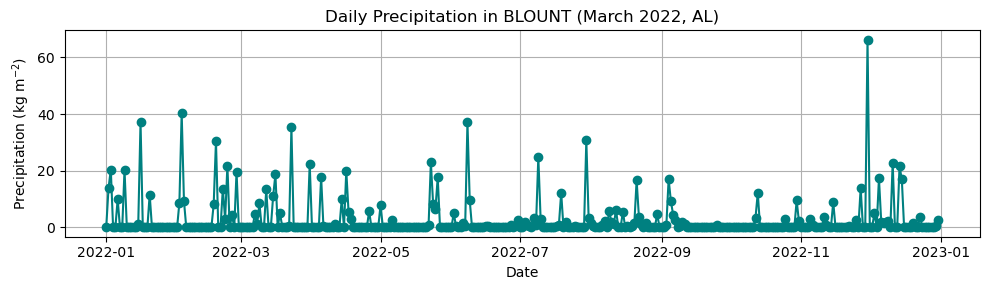

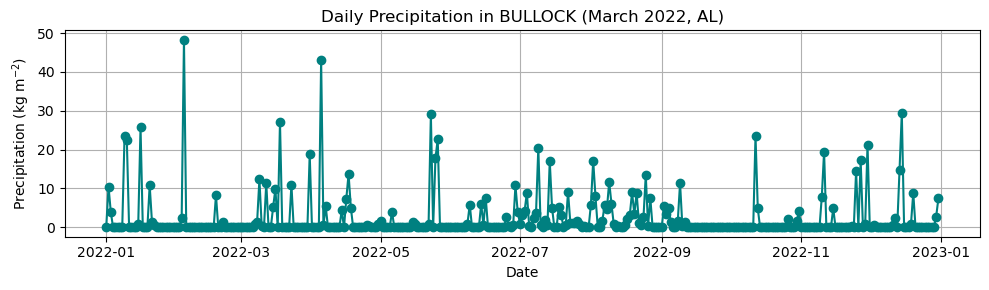

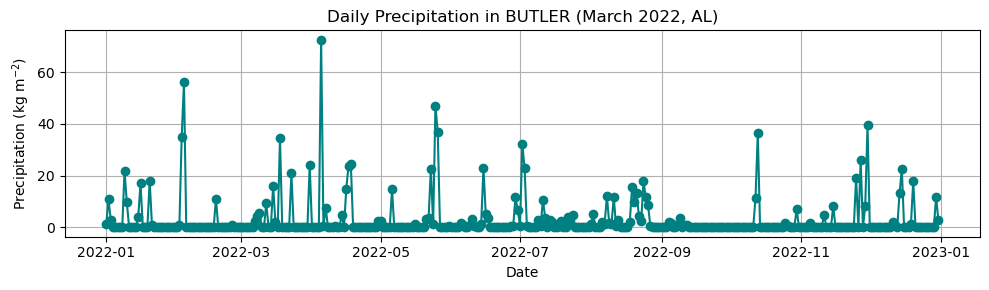

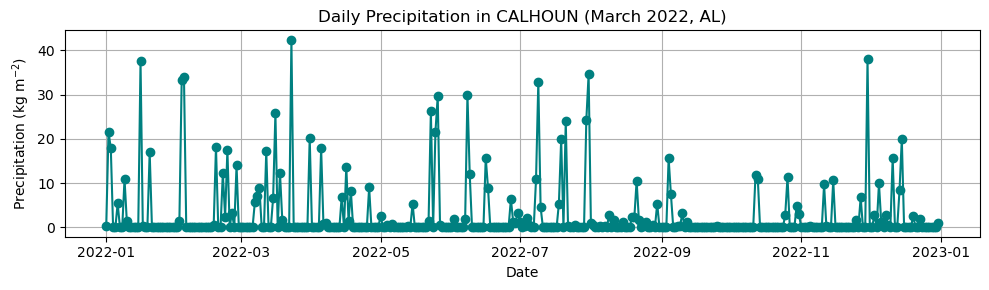

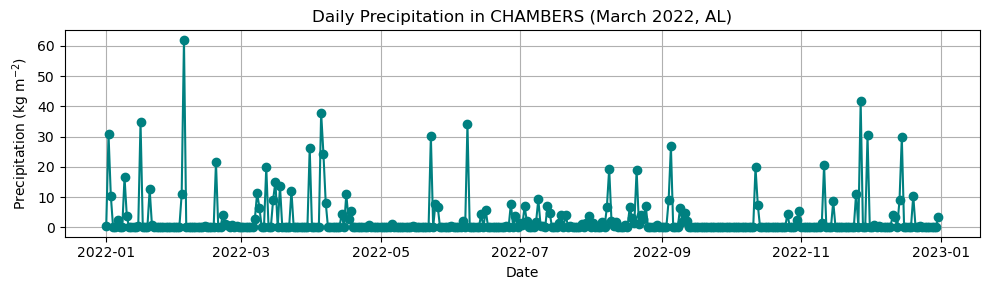

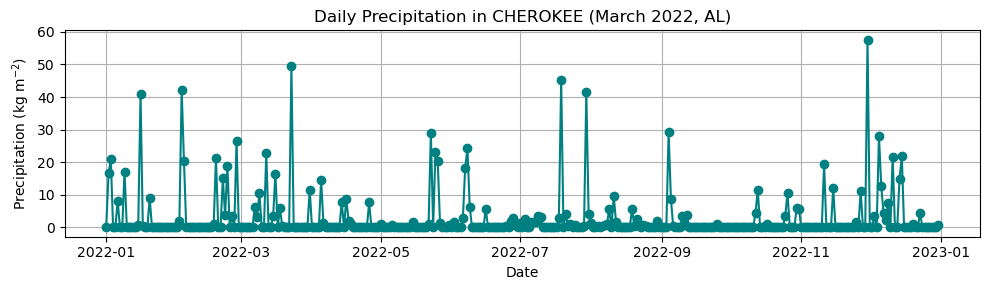

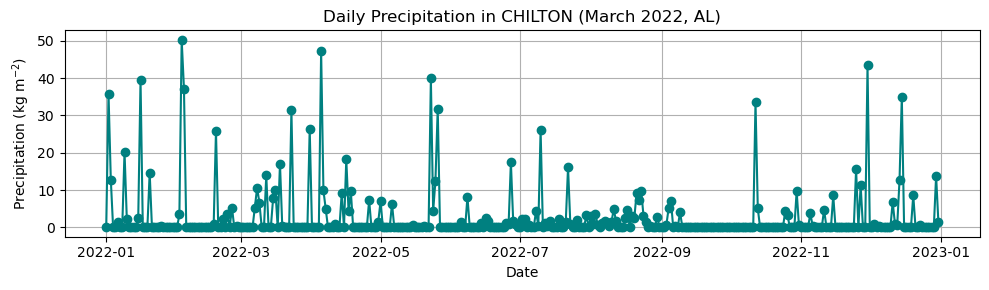

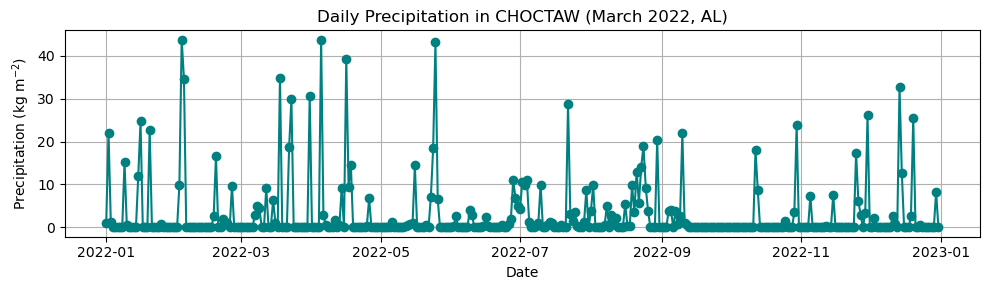

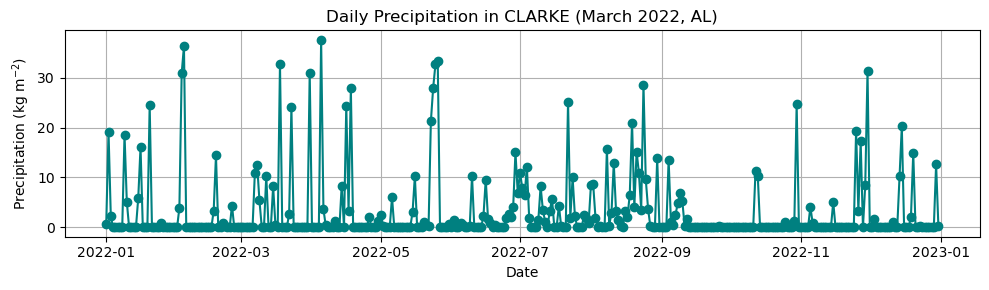

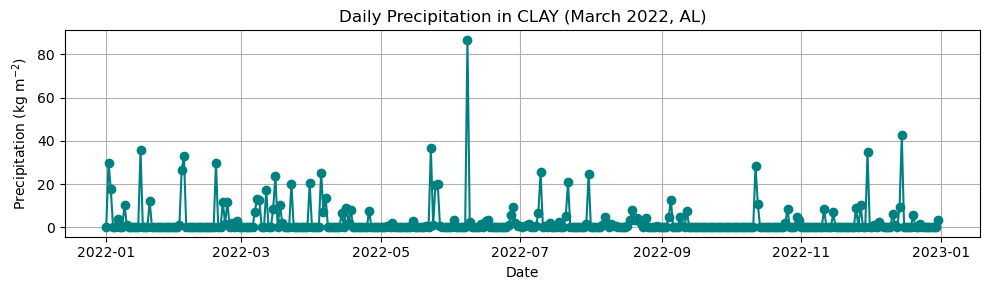

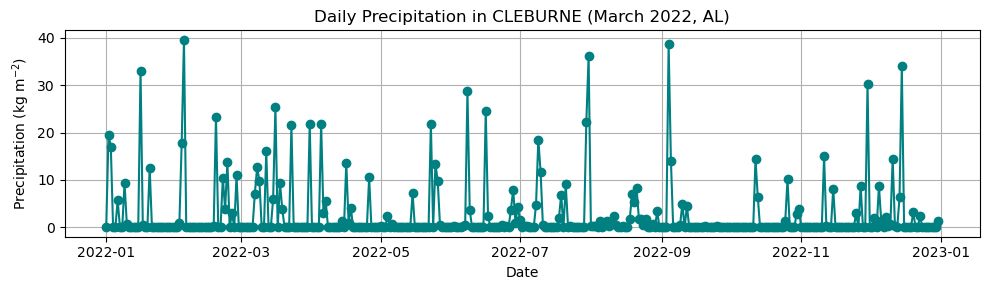

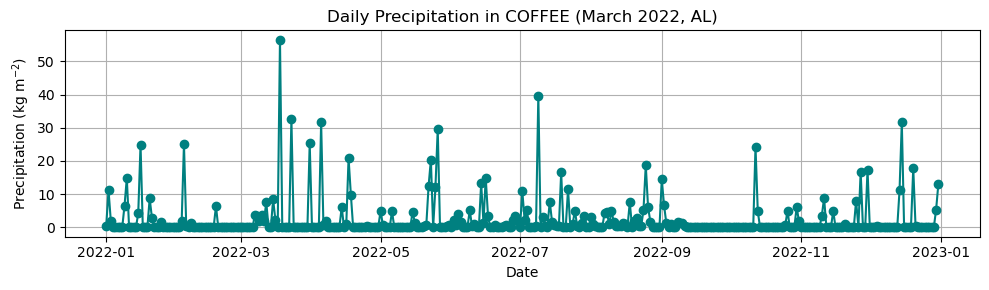

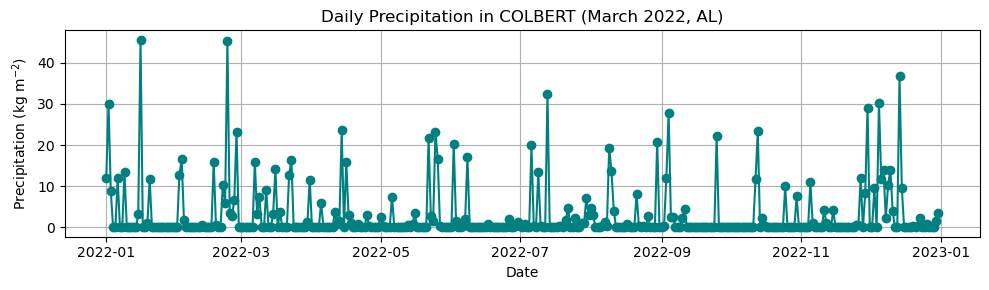

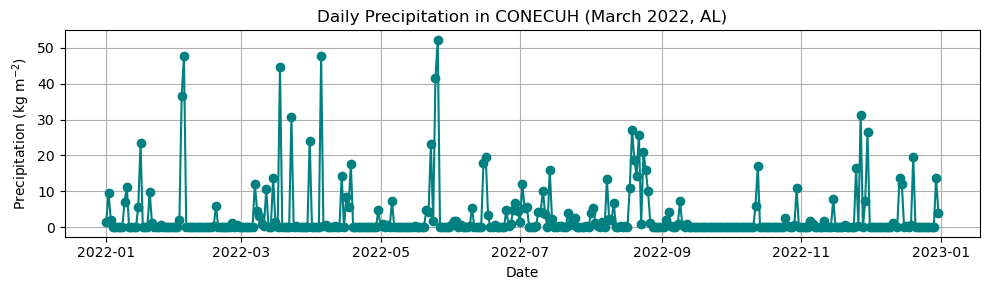

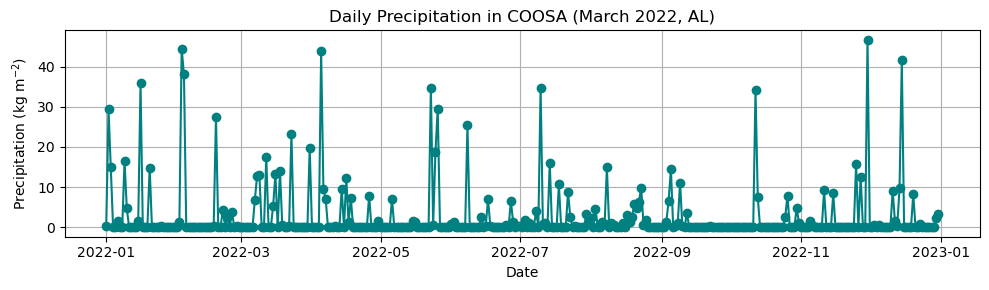

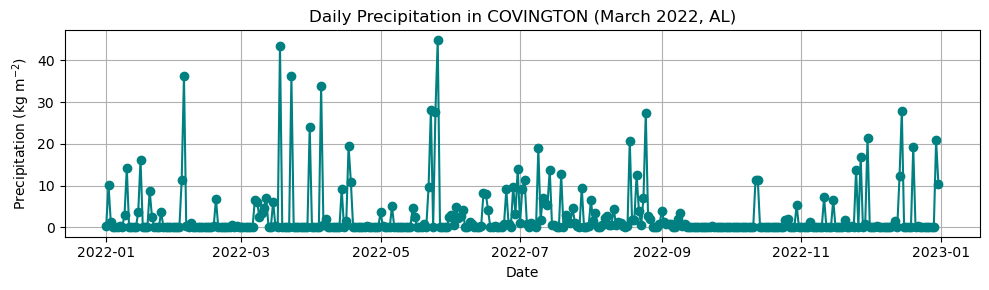

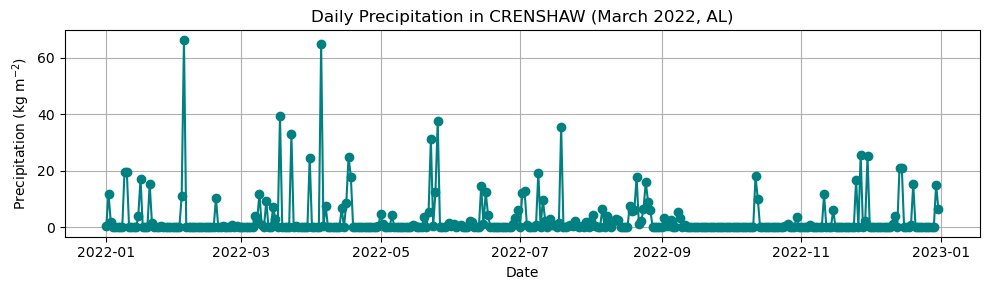

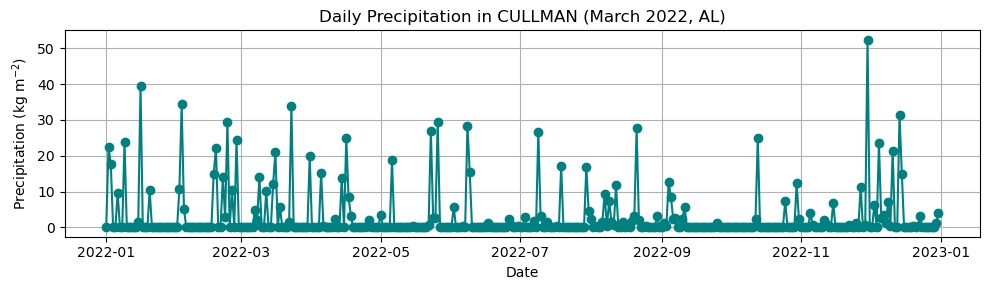

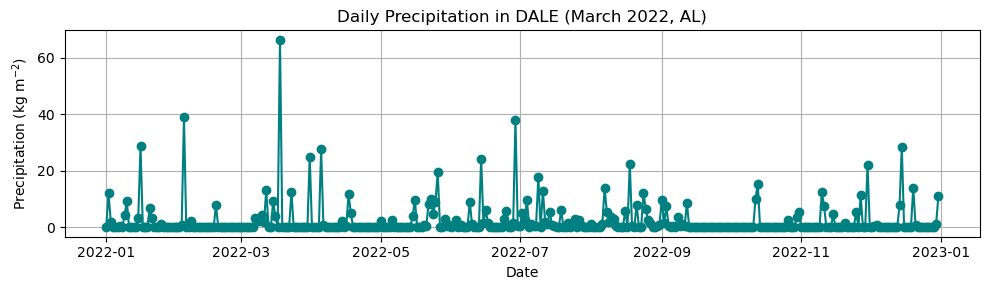

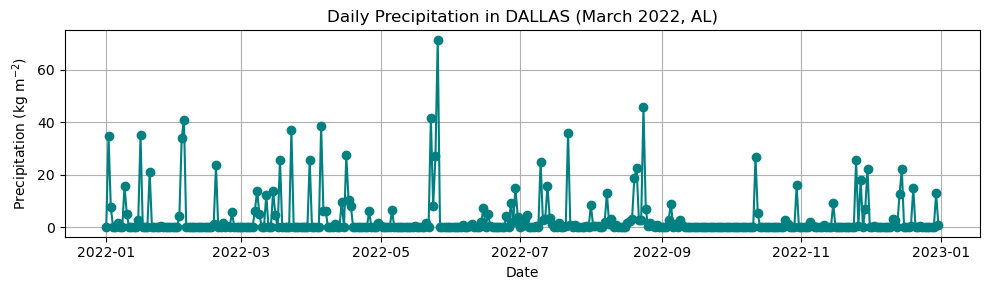

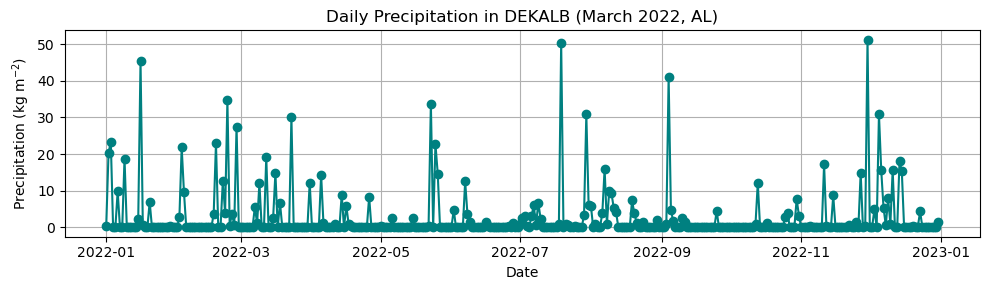

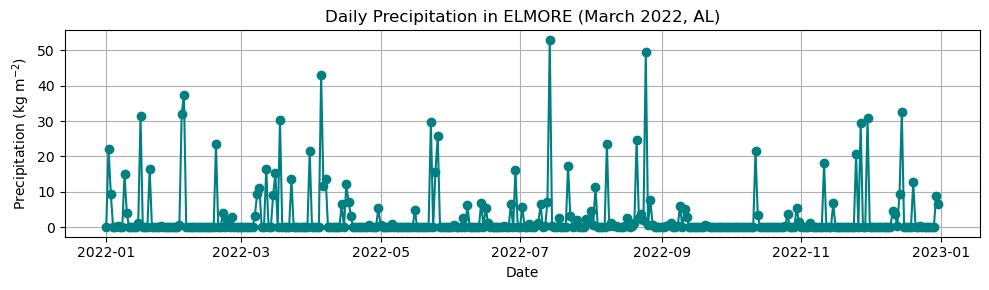

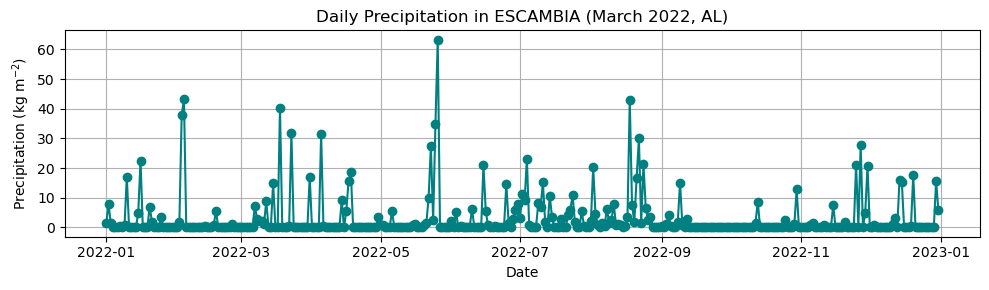

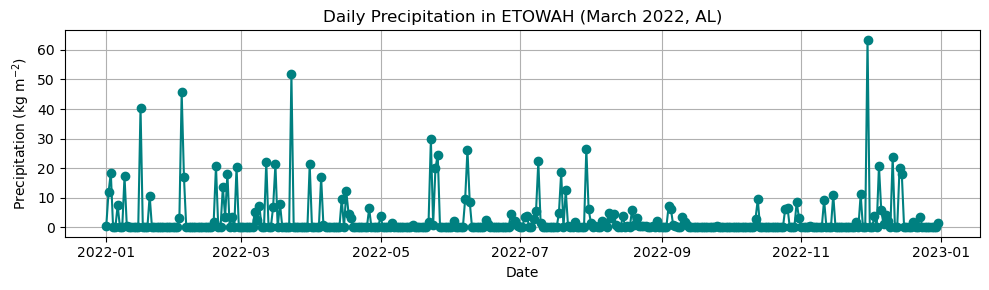

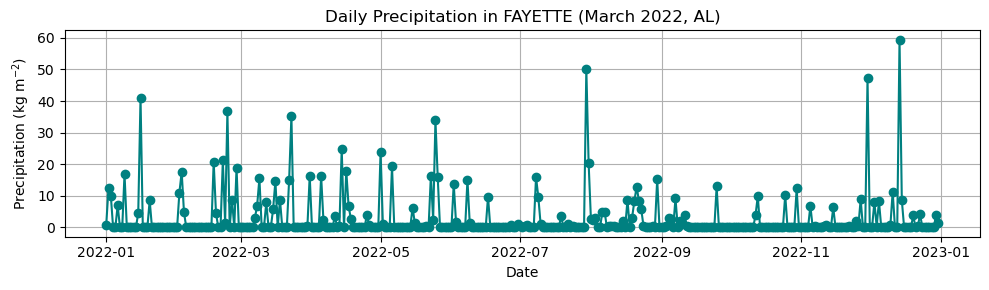

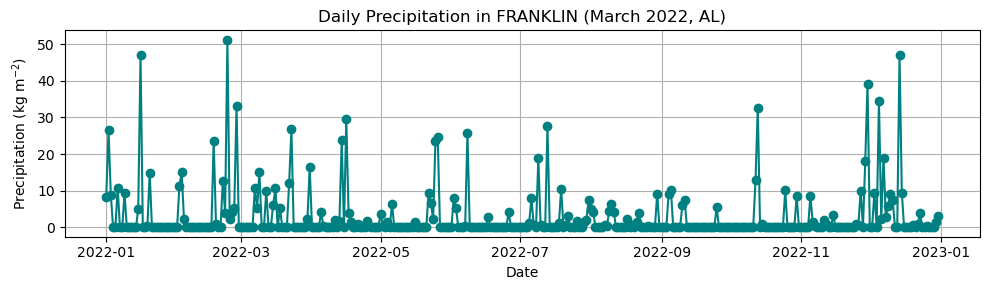

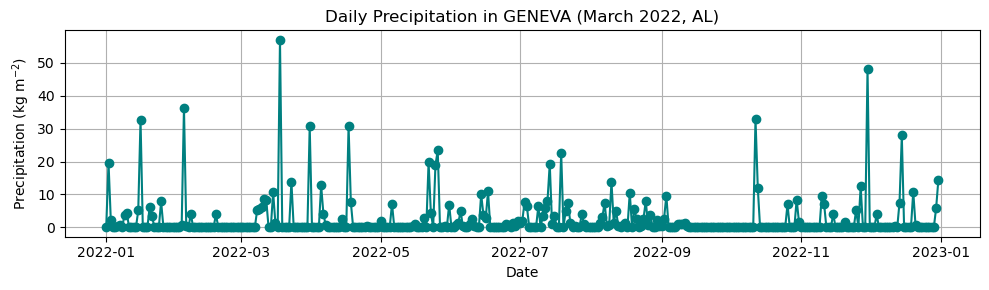

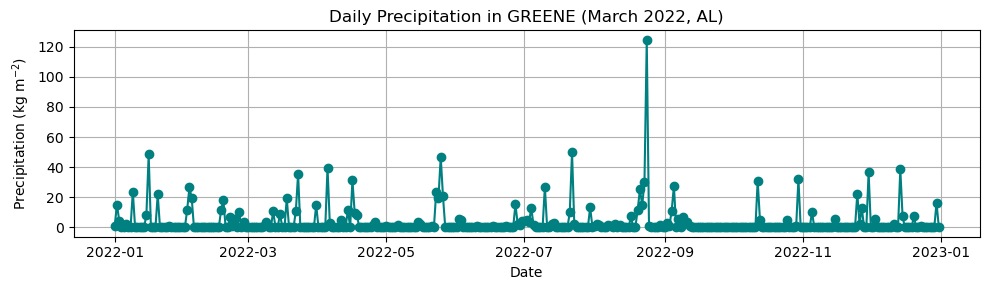

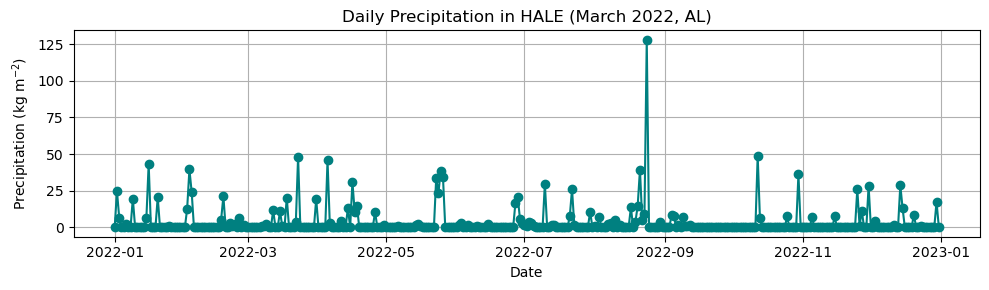

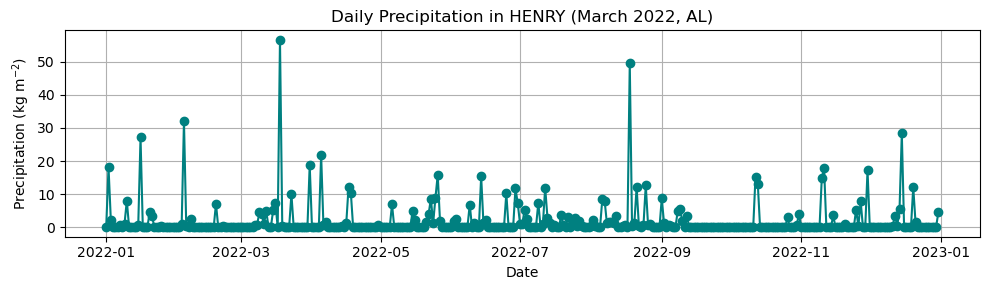

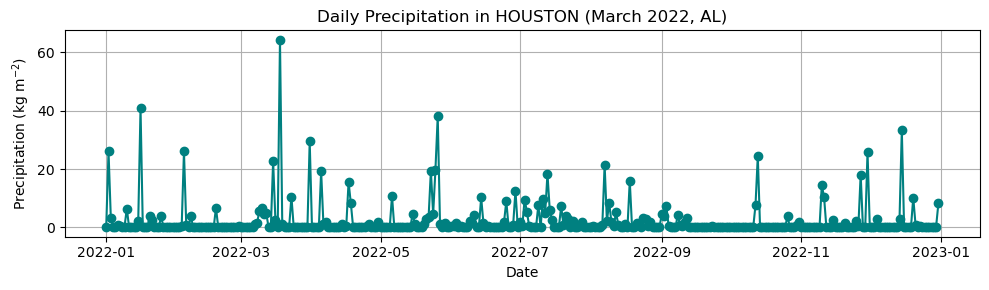

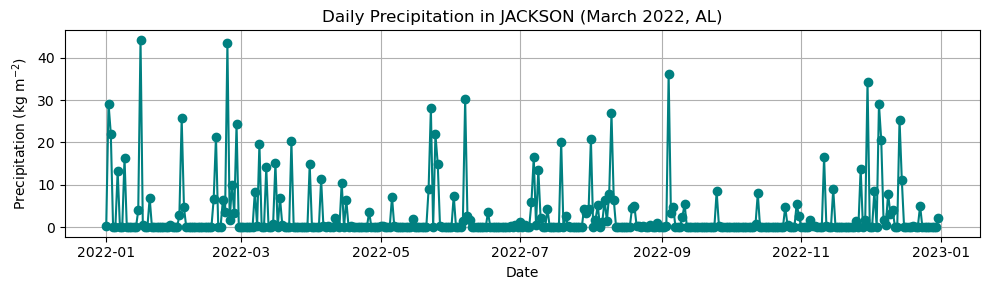

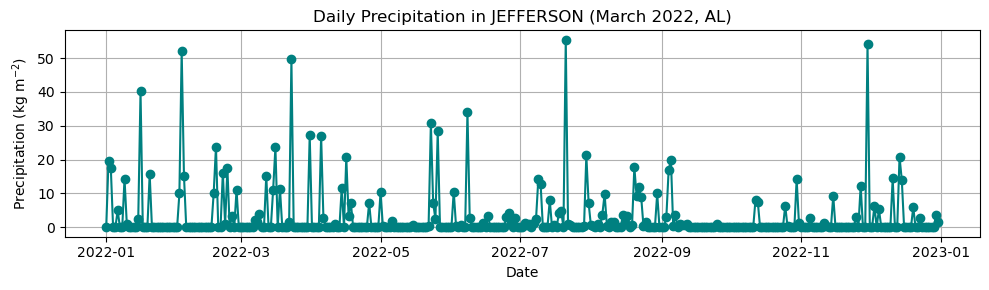

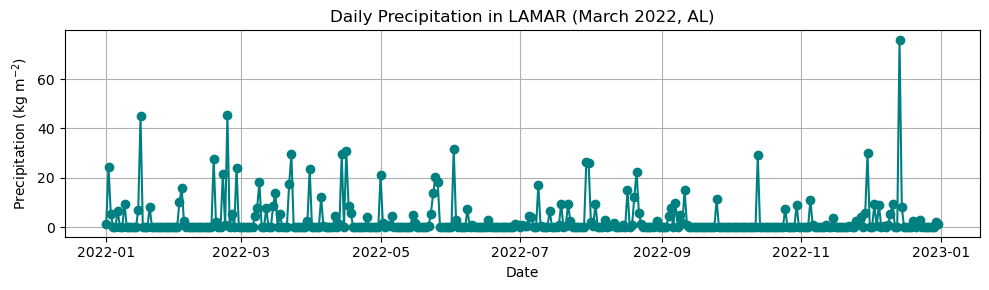

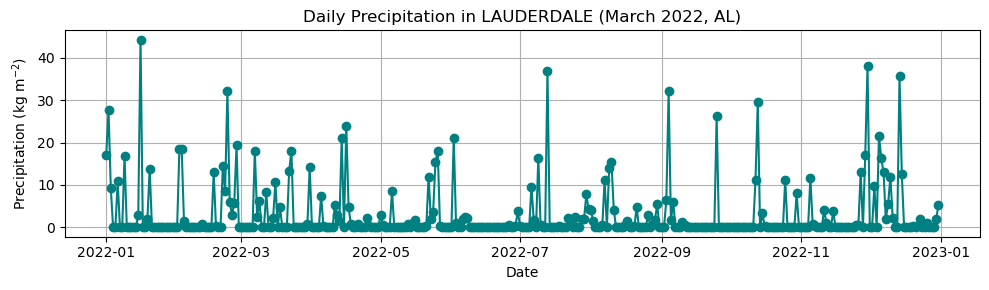

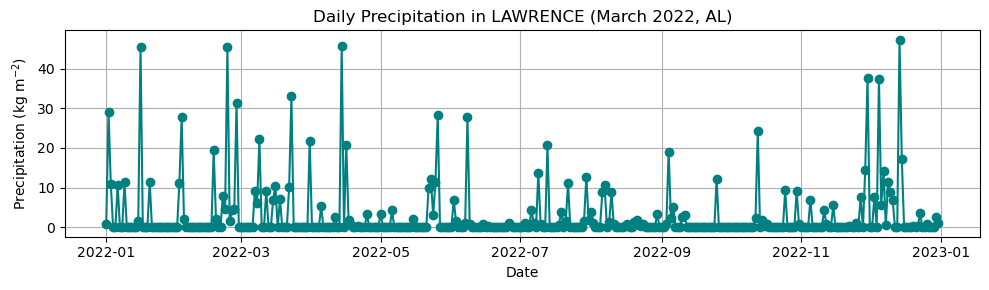

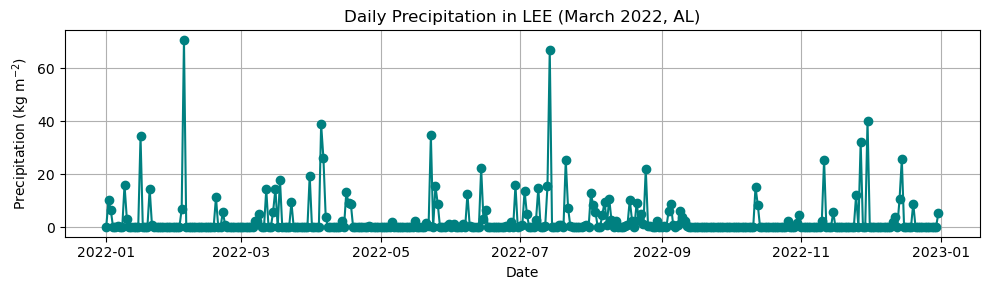

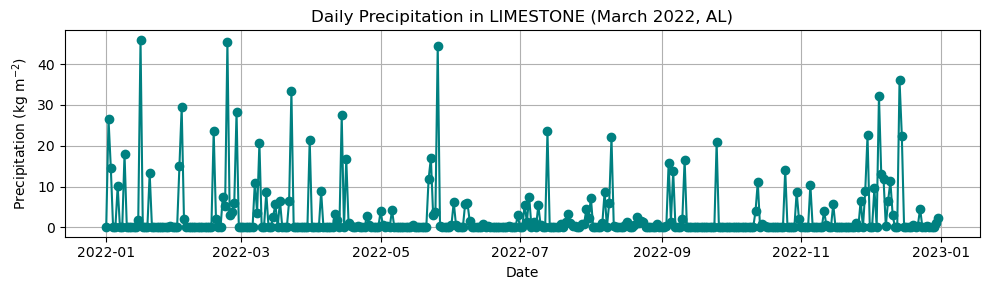

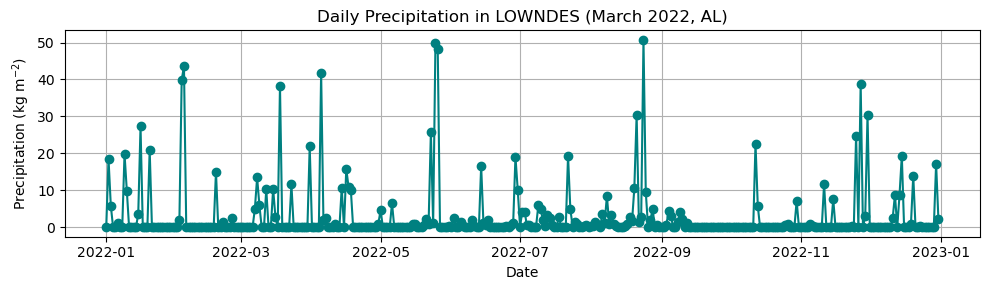

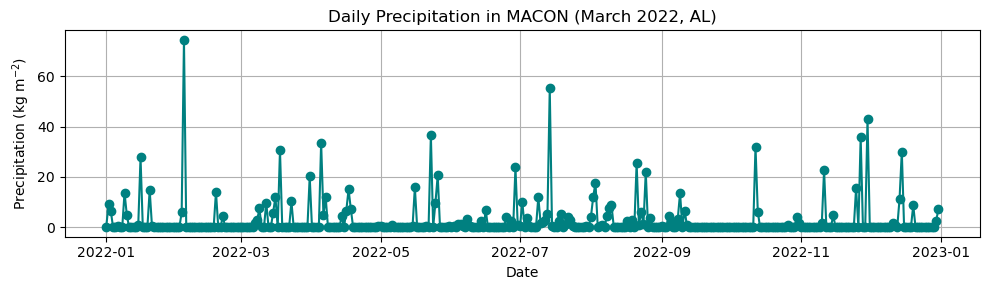

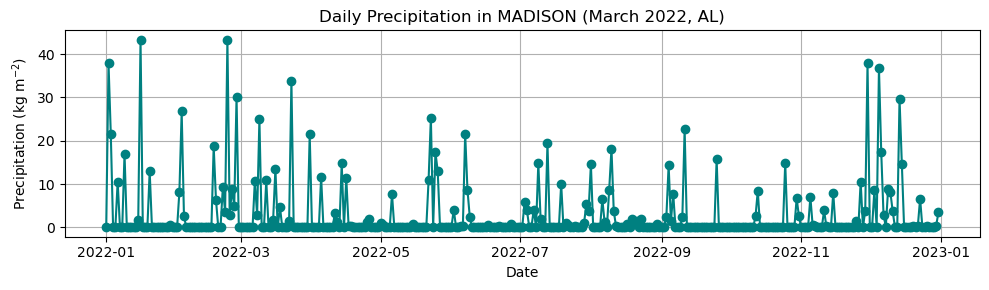

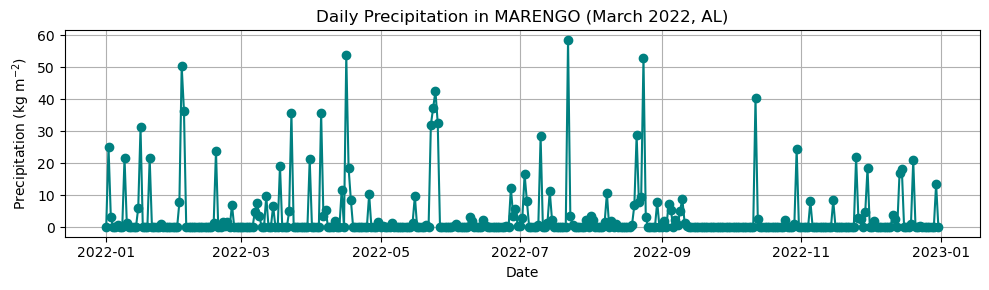

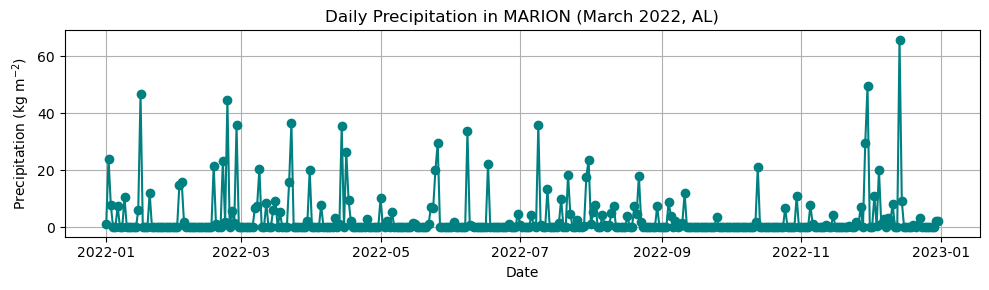

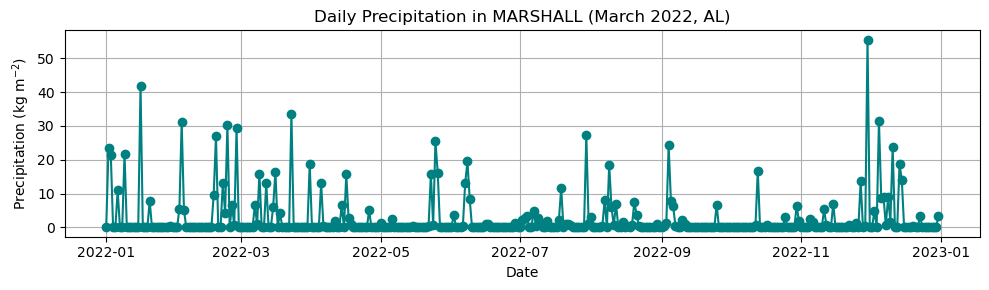

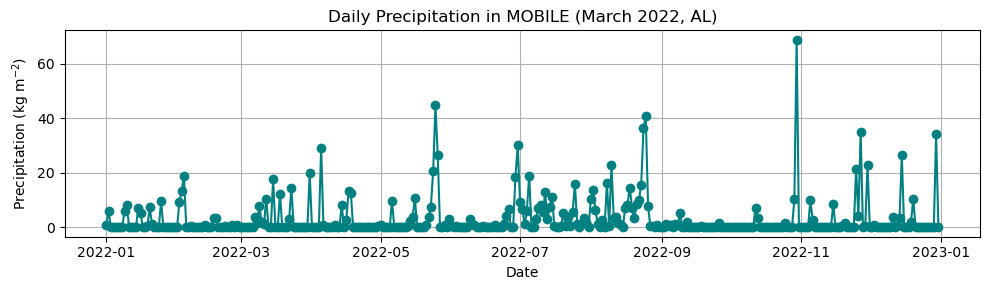

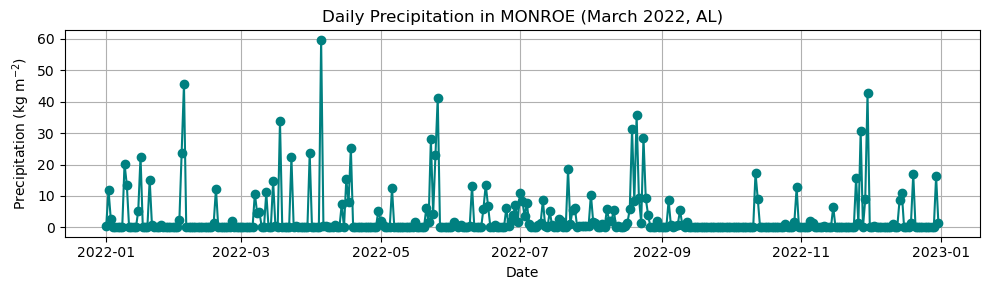

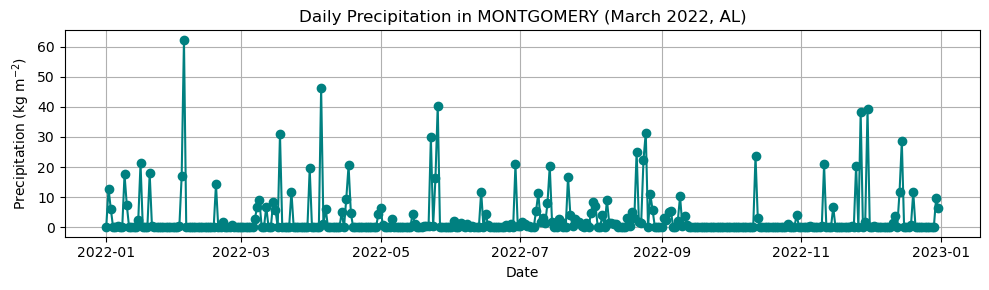

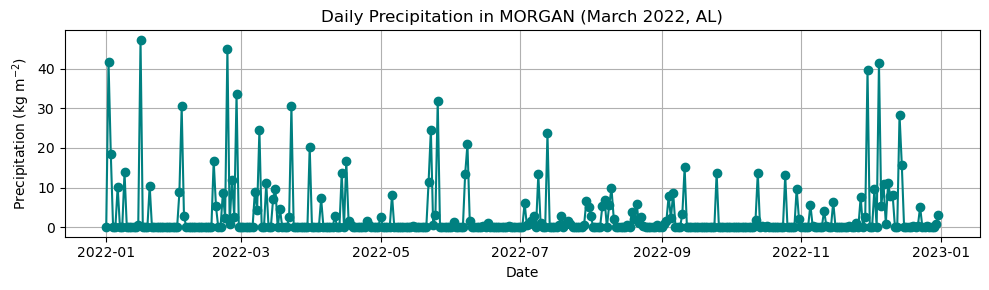

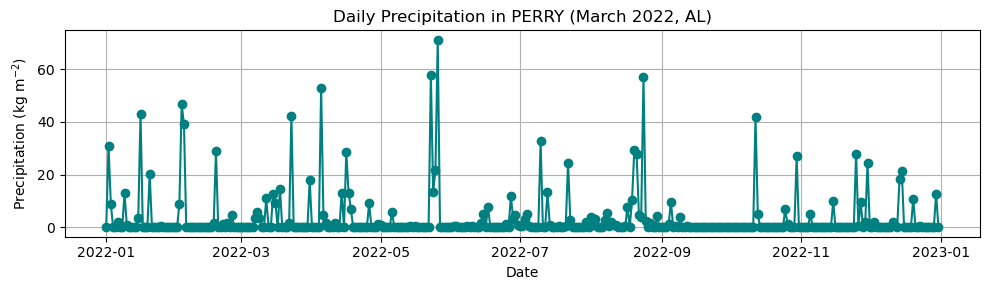

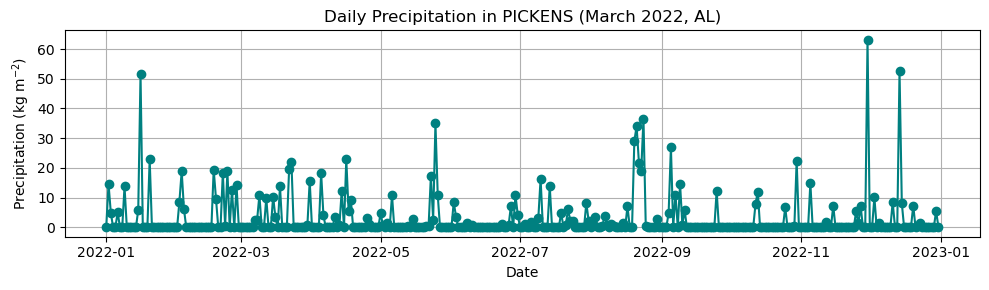

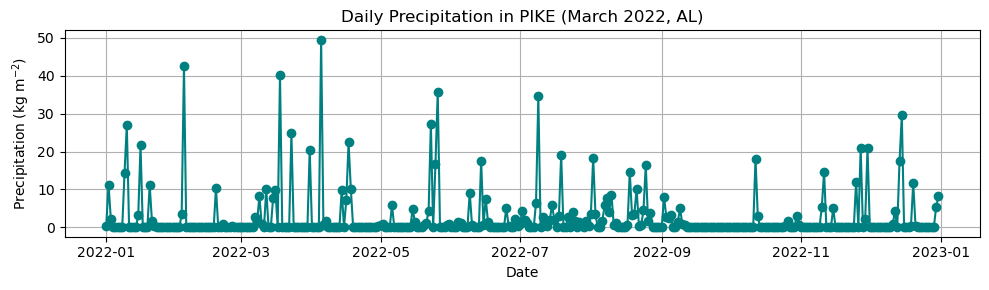

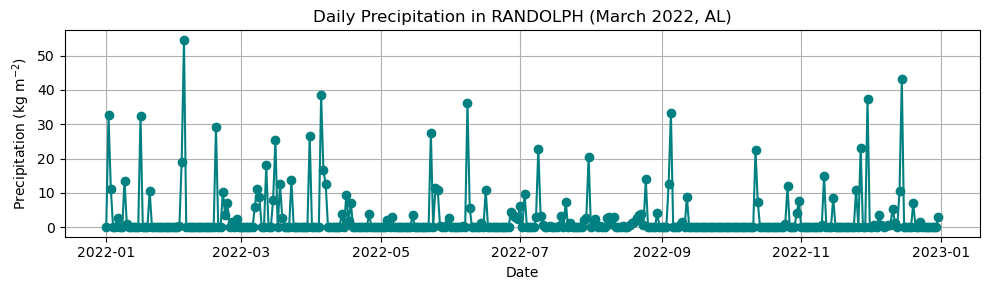

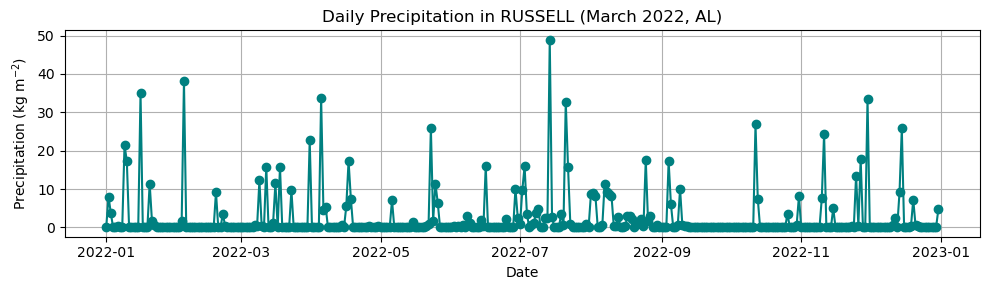

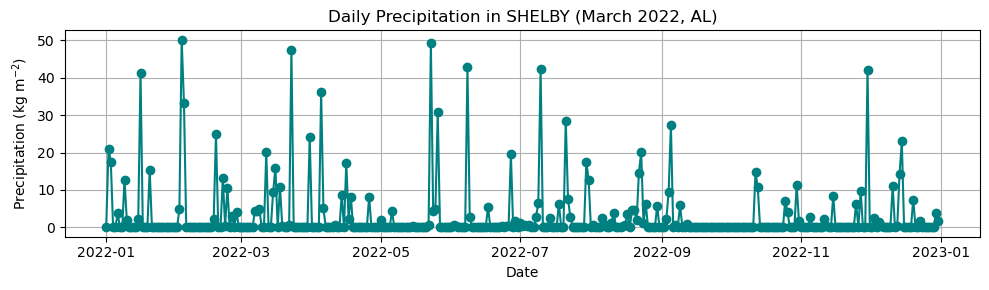

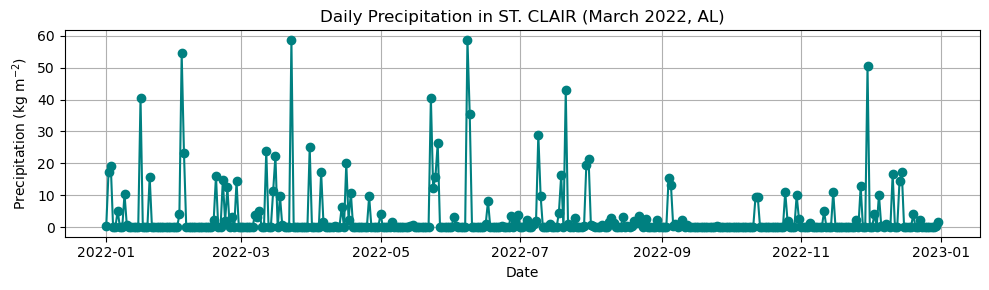

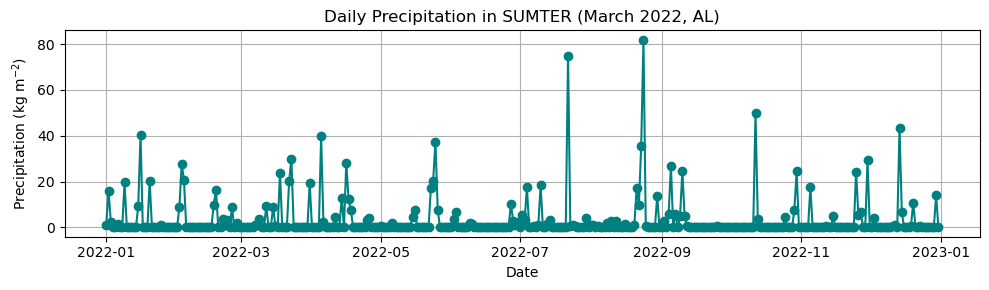

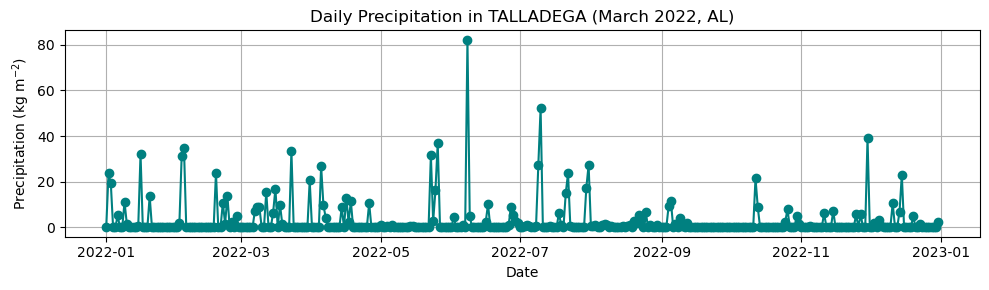

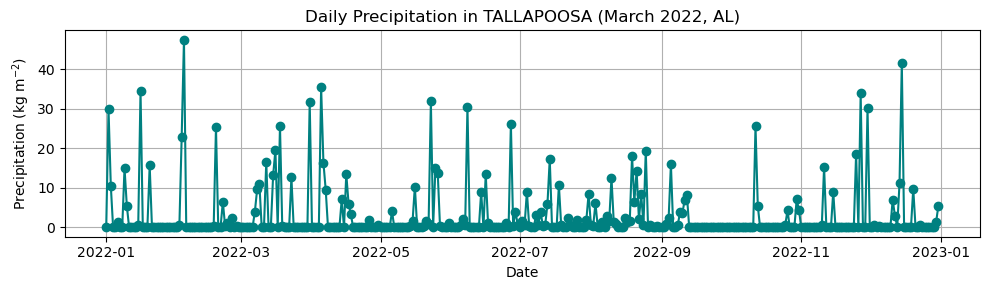

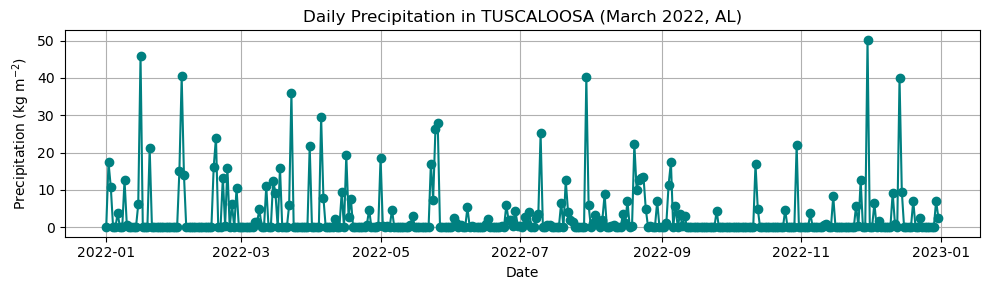

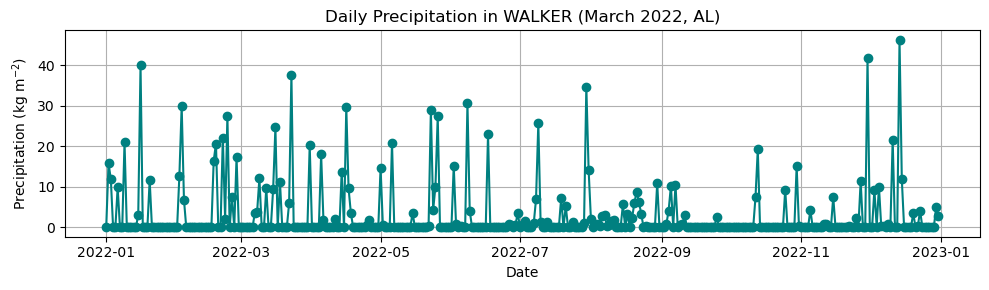

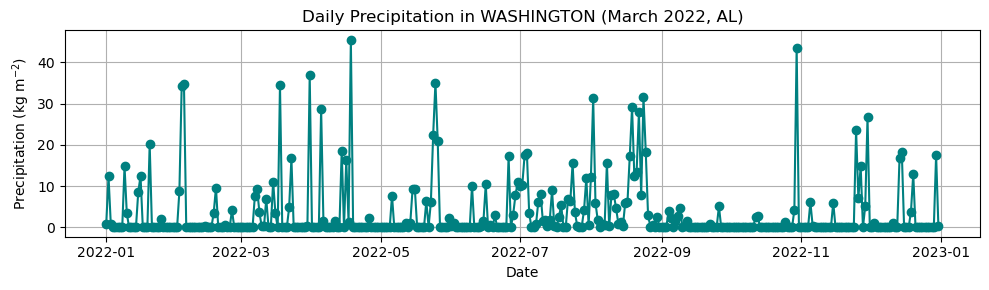

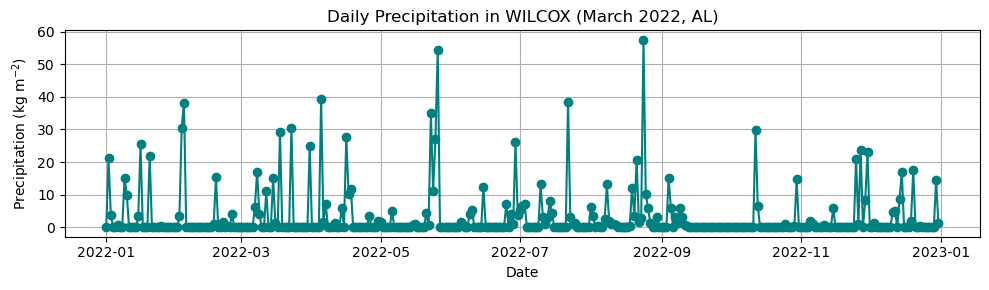

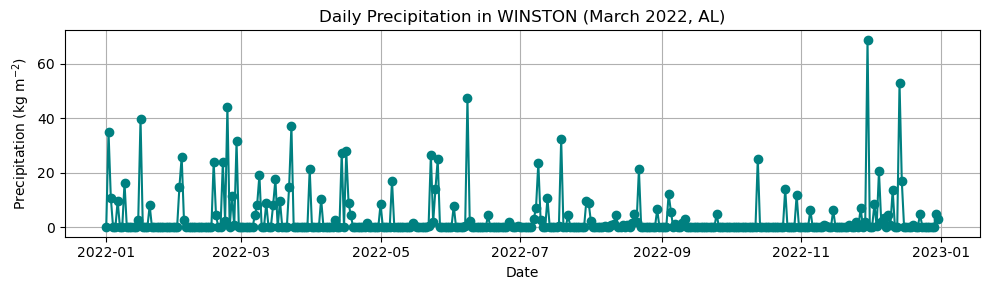

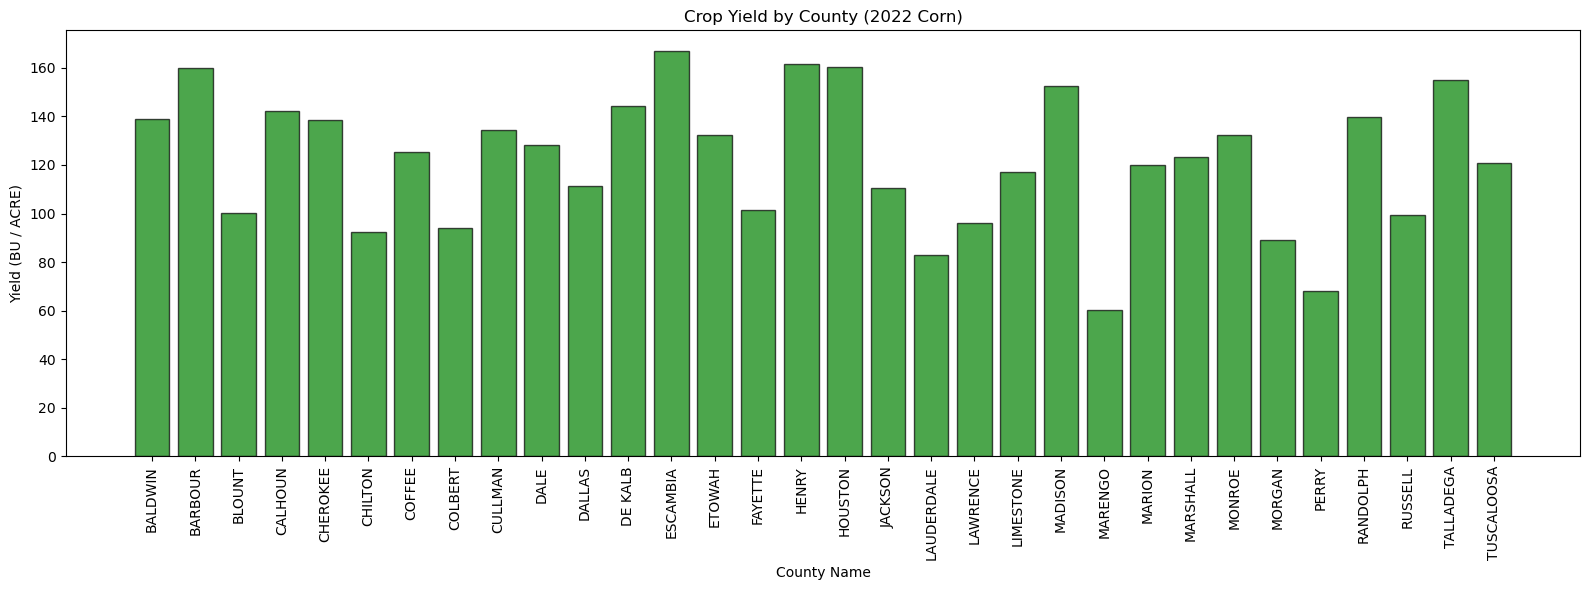

In [126]:

# For each day, find the highest max temperature and the county (and associated grid index) it came from
idx = hrrr_all_year_df.groupby("Date")["Max Temperature (C)"].idxmax()
daily_max_temp = hrrr_all_year_df.loc[idx][["Date", "County", "Max Temperature (C)"]]
daily_max_temp = daily_max_temp.sort_values("Date").reset_index(drop=True)
print(daily_max_temp)

# Line chart: highest max temperature per day and the county it came from
plt.figure(figsize=(12, 5))
plt.plot(daily_max_temp["Date"], daily_max_temp["Max Temperature (C)"], marker='o', linestyle='-', color='crimson', label='Max Temp')
for i, row in daily_max_temp.iterrows():
    plt.text(row["Date"], row["Max Temperature (C)"] + 0.5, row["County"], fontsize=8, rotation=45, ha='center', va='bottom')
plt.title("Daily Highest Max Temperature and County (March 2022, AL)")
plt.xlabel("Date")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()

# For each day, find the highest precipitation and the county (and associated grid index) it came from
idx = hrrr_all_year_df.groupby("Date")["Precipitation (kg m**-2)"].idxmax()
daily_max_precip = hrrr_all_year_df.loc[idx][["Date", "County", "Precipitation (kg m**-2)"]]
daily_max_precip = daily_max_precip.sort_values("Date").reset_index(drop=True)
print(daily_max_precip)

# Line chart: highest precipitation per day and the county it came from
plt.figure(figsize=(12, 5))
plt.plot(daily_max_precip["Date"], daily_max_precip["Precipitation (kg m**-2)"], marker='o', linestyle='-', color='royalblue', label='Max Precipitation')
for i, row in daily_max_precip.iterrows():
    plt.text(row["Date"], row["Precipitation (kg m**-2)"] + 0.2, row["County"], fontsize=8, rotation=45, ha='center', va='bottom')
plt.title("Daily Highest Precipitation and County (March 2022, AL)")
plt.xlabel("Date")
plt.ylabel("Precipitation (kg m$^{-2}$)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 67 graphs: daily precipitation for each county
unique_counties = hrrr_all_year_df["County"].unique()
for county in unique_counties:
    county_df = hrrr_all_year_df[hrrr_all_year_df["County"] == county]
    plt.figure(figsize=(10, 3))
    plt.plot(county_df["Date"], county_df["Precipitation (kg m**-2)"], marker='o', linestyle='-', color='teal')
    plt.title(f"Daily Precipitation in {county} (March 2022, AL)")
    plt.xlabel("Date")
    plt.ylabel("Precipitation (kg m$^{-2}$)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Distribution of crop yield across counties (bar chart)
plt.figure(figsize=(16, 6))
plt.bar(usda_corn_df["county_name"], usda_corn_df["YIELD, MEASURED IN BU / ACRE"], color='green', edgecolor='black', alpha=0.7)
plt.title("Crop Yield by County (2022 Corn)")
plt.xlabel("County Name")
plt.ylabel("Yield (BU / ACRE)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

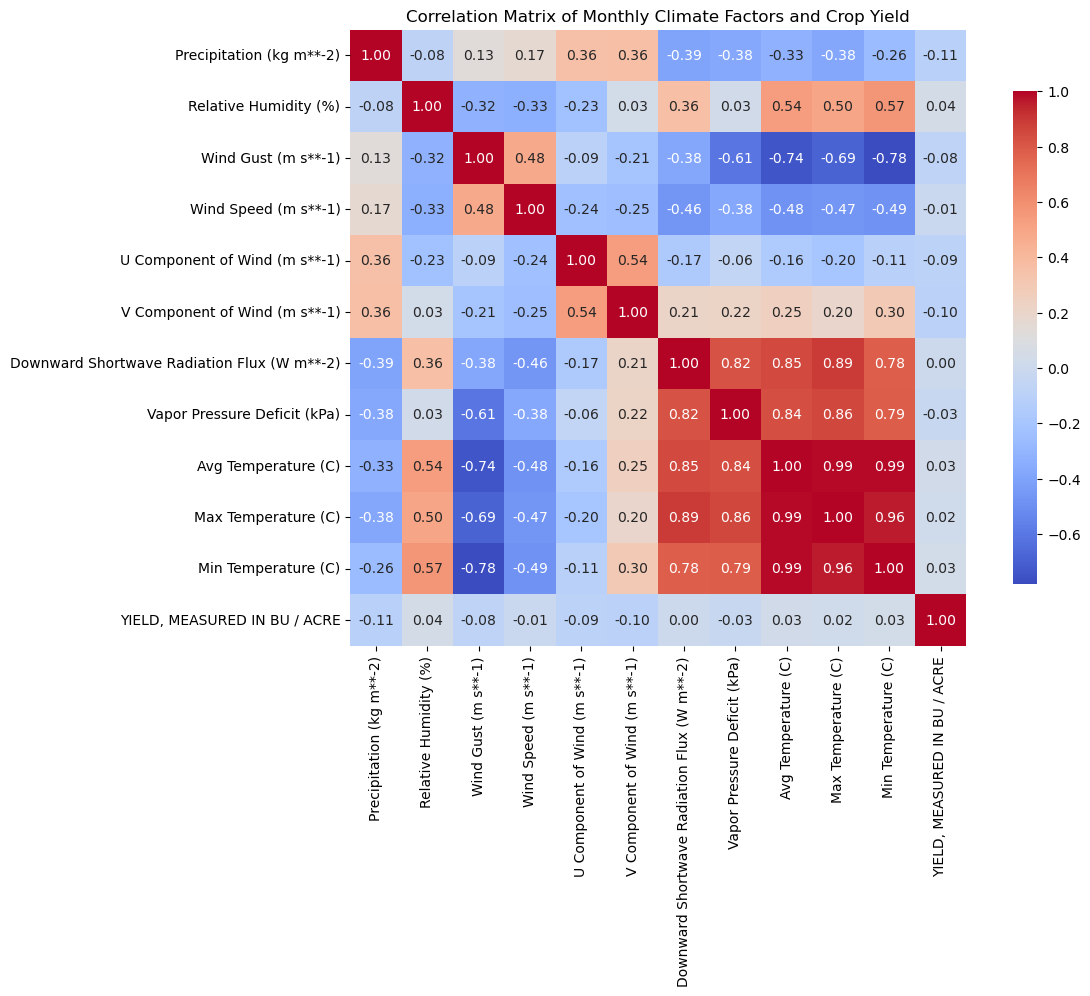

YIELD, MEASURED IN BU / ACRE                   1.000000
Relative Humidity (%)                          0.039977
Min Temperature (C)                            0.033331
Avg Temperature (C)                            0.028543
Max Temperature (C)                            0.021875
Downward Shortwave Radiation Flux (W m**-2)    0.002018
Wind Speed (m s**-1)                          -0.011357
Vapor Pressure Deficit (kPa)                  -0.025397
Wind Gust (m s**-1)                           -0.076483
U Component of Wind (m s**-1)                 -0.090441
V Component of Wind (m s**-1)                 -0.096786
Precipitation (kg m**-2)                      -0.107446
Name: YIELD, MEASURED IN BU / ACRE, dtype: float64


In [127]:
import seaborn as sns
# Merge HRRR monthly data with USDA corn data by FIPS, keeping all HRRR monthly rows (left join)
merged_monthly_df = hrrr_every_month_df.merge(
    usda_corn_df[["FIPS", "YIELD, MEASURED IN BU / ACRE"]],
    on="FIPS",
    how="left"
)
merged_monthly_df_clean = merged_monthly_df.dropna()
merged_monthly_df_clean

# Only include numeric columns in the correlation matrix
monthly_numeric_df = merged_monthly_df_clean.select_dtypes(include=["number"])

# Compute correlation matrix
monthly_corr_matrix = monthly_numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix of Monthly Climate Factors and Crop Yield")
plt.show()

monthly_yield_corr = monthly_corr_matrix["YIELD, MEASURED IN BU / ACRE"].sort_values(ascending=False)
print(monthly_yield_corr)

In [128]:
merged_monthly_df_clean

State      County  Precipitation (kg m**-2)  Relative Humidity (%)  \
1    ALABAMA     BALDWIN                  1.841861              72.732998   
2    ALABAMA     BARBOUR                  2.799485              66.396344   
4    ALABAMA      BLOUNT                  3.703056              66.927074   
7    ALABAMA     CALHOUN                  3.616523              66.408065   
9    ALABAMA    CHEROKEE                  3.686452              66.657143   
..       ...         ...                       ...                    ...   
789  ALABAMA       PERRY                  2.236548              72.112784   
792  ALABAMA    RANDOLPH                  2.551949              72.814247   
793  ALABAMA     RUSSELL                  1.663276              70.803387   
797  ALABAMA   TALLADEGA                  1.814436              70.809010   
799  ALABAMA  TUSCALOOSA                  2.826740              72.746851   

     Wind Gust (m s**-1)  Wind Speed (m s**-1)  U Component of Wind (m s**-1)  \
1               6.853068              6.743207                       0.354913   
2               5.963249              4.273303                       0.557912   
4               6.529457              3.103699                       0.424286   
7               5.997147              2.641298                       0.441879   
9               6.002822              2.613237                       0.458189   
..                   ...                   ...                            ...   
789             5.740436              5.065646                      -0.292791   
792             5.463823              1.988992                       0.022833   
793             5.213405              4.108224                      -0.380623   
797             5.475393              2.568059                       0.005692   
799             5.961694              4.350012                      -0.130550   

     V Component of Wind (m s**-1)  \
1                        -1.749422   
2                        -0.843831   
4                        -0.774506   
7                        -0.603531   
9                        -0.652928   
..                             ...   
789                       0.596969   
792                      -0.016608   
793                      -0.123111   
797                       0.256227   
799                       0.602714   

     Downward Shortwave Radiation Flux (W m**-2)  \
1                                    3034.614490   
2                                    3009.552258   
4                                    2718.283641   
7                                    2661.870323   
9                                    2595.370814   
..                                           ...   
789                                  2299.305615   
792                                  2122.408602   
793                                  2357.000000   
797                                  2168.414572   
799                                  2099.143088   

     Vapor Pressure Deficit (kPa)  Avg Temperature (C)  Max Temperature (C)  \
1                        0.342061             9.283907            15.747453   
2                        0.417730             8.148353            15.404311   
4                        0.318297             4.882684            11.411570   
7                        0.330081             5.182384            11.775008   
9                        0.314312             4.601235            10.882387   
..                            ...                  ...                  ...   
789                      0.357289            10.585618            16.226016   
792                      0.288927             8.347239            13.481360   
793                      0.375398            10.381077            16.197071   
797                      0.340849             9.286061            14.499775   
799                      0.325164             9.746571            15.035181   

     Min Temperature (C)       Date   FIPS  YIELD, MEASURED IN BU / ACRE  
1  

         State      County       Date  Precipitation (kg m**-2)  \
365    ALABAMA     BALDWIN 2022-01-01                  0.660656   
366    ALABAMA     BALDWIN 2022-01-02                  7.635426   
367    ALABAMA     BALDWIN 2022-01-03                  0.926934   
368    ALABAMA     BALDWIN 2022-01-04                  0.000049   
369    ALABAMA     BALDWIN 2022-01-05                  0.003164   
...        ...         ...        ...                       ...   
22990  ALABAMA  TUSCALOOSA 2022-12-27                  0.001024   
22991  ALABAMA  TUSCALOOSA 2022-12-28                  0.000000   
22992  ALABAMA  TUSCALOOSA 2022-12-29                  0.000286   
22993  ALABAMA  TUSCALOOSA 2022-12-30                  7.086619   
22994  ALABAMA  TUSCALOOSA 2022-12-31                  2.517524   

       Relative Humidity (%)  Wind Gust (m s**-1)  Wind Speed (m s**-1)  \
365                88.972131            12.472148              9.403230   
366                88.950820            11.78

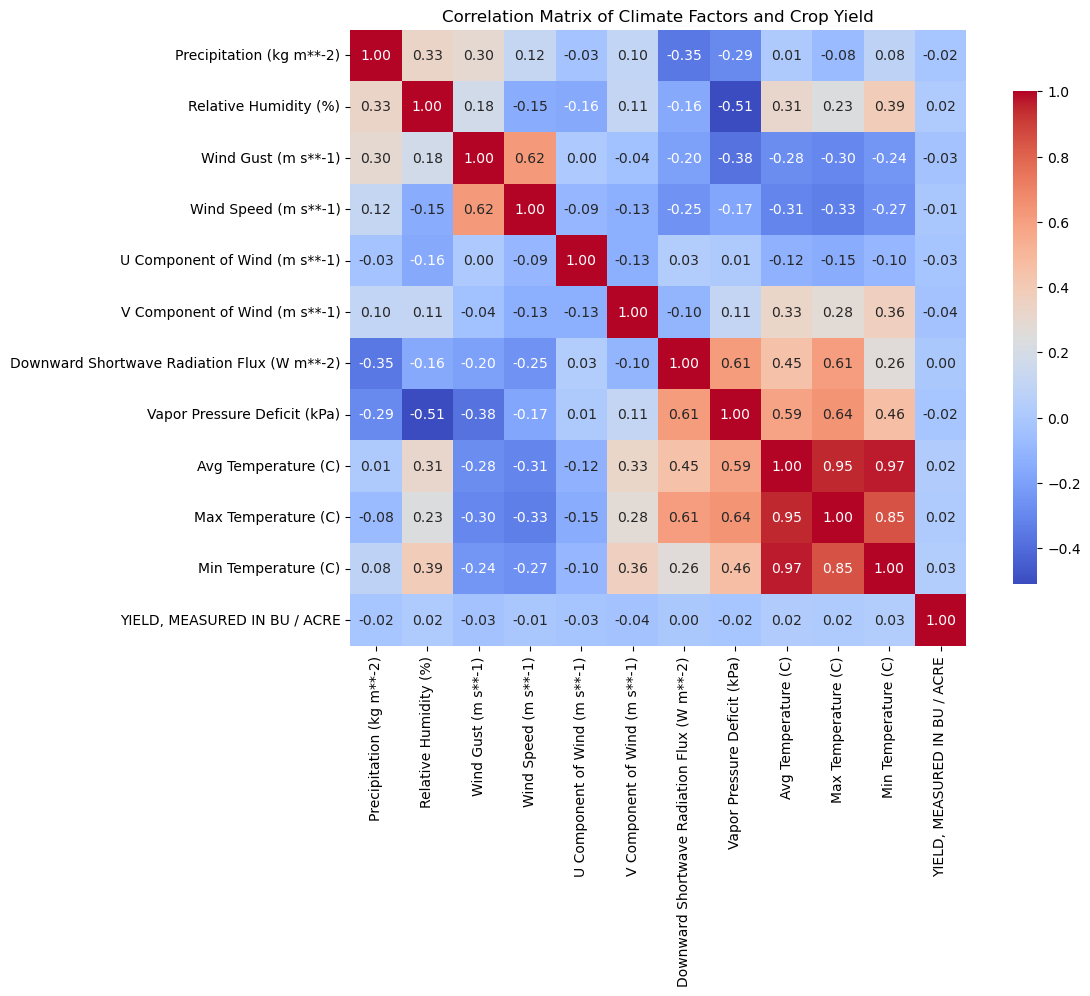

YIELD, MEASURED IN BU / ACRE                   1.000000
Min Temperature (C)                            0.026499
Avg Temperature (C)                            0.024196
Relative Humidity (%)                          0.019480
Max Temperature (C)                            0.018764
Downward Shortwave Radiation Flux (W m**-2)    0.001116
Wind Speed (m s**-1)                          -0.008232
Vapor Pressure Deficit (kPa)                  -0.016730
Precipitation (kg m**-2)                      -0.019394
U Component of Wind (m s**-1)                 -0.026228
Wind Gust (m s**-1)                           -0.032805
V Component of Wind (m s**-1)                 -0.037852
Name: YIELD, MEASURED IN BU / ACRE, dtype: float64


In [129]:

hrrr_all_year_df.head()
# Merge HRRR daily data with USDA corn data by FIPS, keeping all HRRR daily rows (left join)
merged_df = hrrr_all_year_df.merge(
    usda_corn_df[["FIPS", "YIELD, MEASURED IN BU / ACRE"]],
    on="FIPS",
    how="left"
)
merged_df_clean = merged_df.dropna()
print(merged_df_clean)
# Only include numeric columns in the correlation matrix
numeric_df = merged_df_clean.select_dtypes(include=["number"])

# Now compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix of Climate Factors and Crop Yield")
plt.show()
yield_corr = corr_matrix["YIELD, MEASURED IN BU / ACRE"].sort_values(ascending=False)
print(yield_corr)




In [130]:
# Calculate daily max, min, average temperature, and total precipitation for each county
daily_stats = merged_df_clean.groupby(['Date', 'County']).agg({
    'Max Temperature (C)': 'max',
    'Min Temperature (C)': 'min',
    'Avg Temperature (C)': 'mean',
    'Precipitation (kg m**-2)': 'sum'
}).reset_index()

# Rename columns for clarity
daily_stats = daily_stats.rename(columns={
    'Max Temperature (C)': 'Daily Max Temp (C)',
    'Min Temperature (C)': 'Daily Min Temp (C)',
    'Avg Temperature (C)': 'Daily Avg Temp (C)',
    'Precipitation (kg m**-2)': 'Daily Total Precipitation (kg m**-2)'
})

daily_stats

Date      County  Daily Max Temp (C)  Daily Min Temp (C)  \
0     2022-01-01     BALDWIN           25.033148           21.943803   
1     2022-01-01     BARBOUR           27.488300           21.657433   
2     2022-01-01      BLOUNT           24.706143           20.167607   
3     2022-01-01     CALHOUN           24.384500           19.644050   
4     2022-01-01    CHEROKEE           24.396762           18.348476   
...          ...         ...                 ...                 ...   
11675 2022-12-31       PERRY           19.640444           14.832000   
11676 2022-12-31    RANDOLPH           16.951583           12.529750   
11677 2022-12-31     RUSSELL           18.693150           14.426250   
11678 2022-12-31   TALLADEGA           18.319138           12.716241   
11679 2022-12-31  TUSCALOOSA           19.840357           14.497881   

       Daily Avg Temp (C)  Daily Total Precipitation (kg m**-2)  
0               23.116016                              0.660656  
1               23.765433                              0.104033  
2               21.810786                              0.033464  
3               21.526650                              0.216250  
4               20.927857                              0.071095  
...                   ...                                   ...  
11675           16.544296                              0.240815  
11676           14.236417                              2.953667  
11677           16.150000                              4.796450  
11678           15.303966                              2.426448  
11679           16.220071                              2.517524  

[11680 rows x 6 columns]

In [131]:
# Define growing season months (April=4 to September=9)
growing_season = (merged_df_clean["Date"].dt.month >= 4) & (merged_df_clean["Date"].dt.month <= 9)
growing_df = merged_df_clean[growing_season].copy()

# Group by FIPS and County for growing season stats
growing_stats = growing_df.groupby(["FIPS", "County"]).agg(
    Avg_Growing_Season_Temp=("Avg Temperature (C)", "mean"),
    Cumulative_Rainfall=("Precipitation (kg m**-2)", "sum"),
    Hot_Days=("Max Temperature (C)", lambda x: (x > 35).sum()),
    Cold_Days=("Min Temperature (C)", lambda x: (x < 10).sum()),
    Days_Without_Rain=("Precipitation (kg m**-2)", lambda x: (x == 0).sum())
).reset_index()

growing_stats

FIPS      County  Avg_Growing_Season_Temp  Cumulative_Rainfall  Hot_Days  \
0   01003     BALDWIN                25.110061           793.066197         4   
1   01005     BARBOUR                24.302341           356.166900        12   
2   01009      BLOUNT                23.087842           369.884357         3   
3   01015     CALHOUN                22.783162           454.133400         0   
4   01019    CHEROKEE                22.682649           385.721000         2   
5   01021     CHILTON                23.534579           405.121042         5   
6   01031      COFFEE                24.475884           434.657312         8   
7   01033     COLBERT                23.417817           432.052478        17   
8   01043     CULLMAN                23.087924           400.632957         4   
9   01045        DALE                24.475002           422.661250         8   
10  01047      DALLAS                24.273418           586.748237        15   
11  01049      DEKALB                21.890057           395.788103         0   
12  01053    ESCAMBIA                24.530566           650.282700         8   
13  01055      ETOWAH                22.670573           365.254667         1   
14  01057     FAYETTE                23.720591           469.735286        10   
15  01067       HENRY                24.222855           354.650167         9   
16  01069     HOUSTON                24.577063           392.279583        13   
17  01071     JACKSON                22.201100           401.488286         1   
18  01077  LAUDERDALE                23.113055           403.818500        10   
19  01079    LAWRENCE                23.226943           364.859850        15   
20  01083   LIMESTONE                23.022651           364.588067        10   
21  01089     MADISON                22.836331           365.036300         3   
22  01091     MARENGO                24.338294           653.897690        15   
23  01093      MARION                23.065189           488.004636         4   
24  01095    MARSHALL                22.733012           332.520174         1   
25  01099      MONROE                24.448186           584.868333        15   
26  01103      MORGAN                23.148617           340.708400         7   
27  01105       PERRY                24.208206           620.094333        13   
28  01111    RANDOLPH                22.539054           413.729000         0   
29  01113     RUSSELL                24.232278           459.742600        12   
30  01121   TALLADEGA                22.976161           541.143138         0   
31  01125  TUSCALOOSA                24.076098           496.214500        14   

    Cold_Days  Days_Without_Rain  
0           5                 28  
1          12                 41  
2          16                 58  
3          16                 63  
4          18                 57  
5          12                 54  
6          10                 50  
7          21                 71  
8          17                 66  
9          10                 51  
10         12                 53  
11         16                 55  
12          9                 42  
13         17                 66  
14         18                 63  
15         11                 56  
16          9                 48  
17         16                 48  
18         21                 66  
19         19                 72  
20         18                 70  
21         17                 60  
22         13                 57  
23         18                 69  
24         16                 59  
25         11                 44  
26         17                 66  
27         12                 57  
28         16                 54  
29         13                 47  
30         15                 54  
31         15                 58

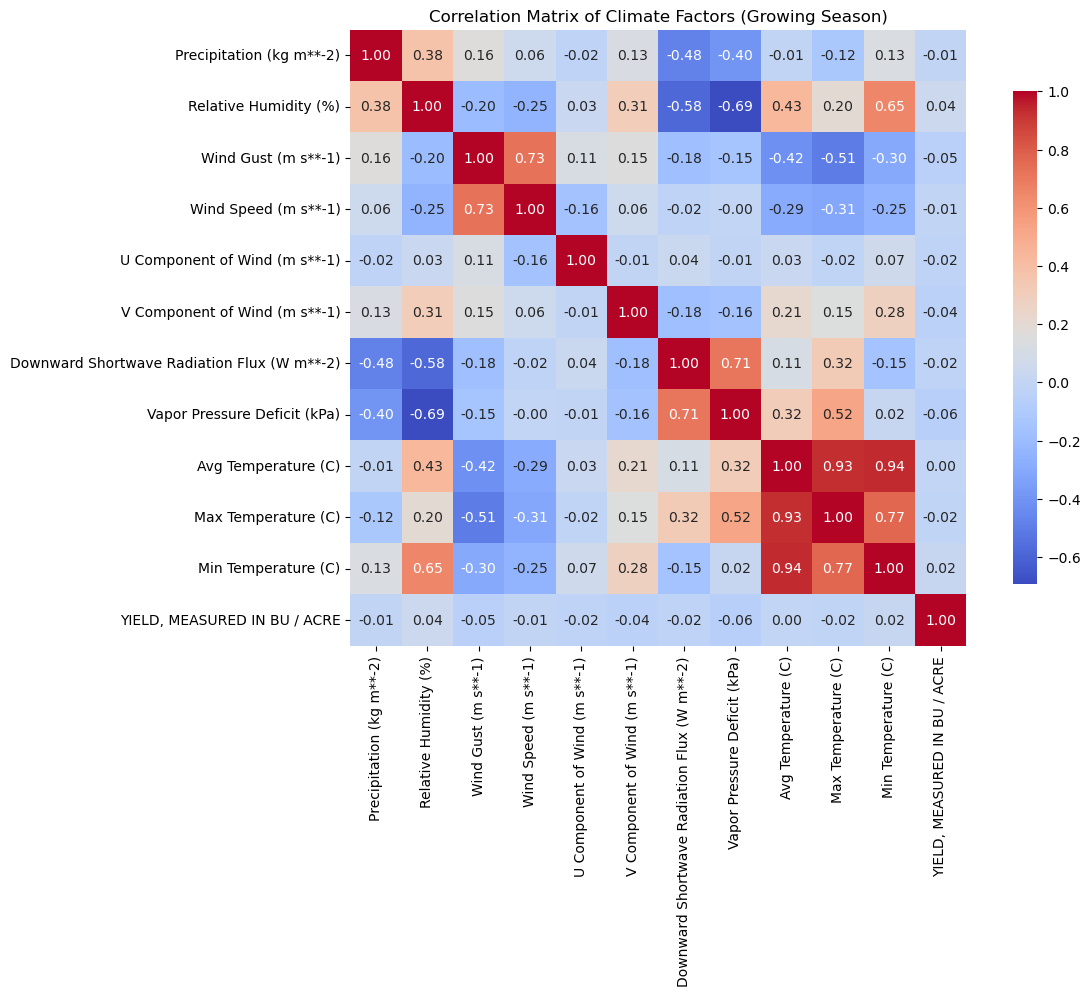

YIELD, MEASURED IN BU / ACRE                   1.000000
Relative Humidity (%)                          0.041759
Min Temperature (C)                            0.016674
Avg Temperature (C)                            0.000331
Precipitation (kg m**-2)                      -0.009022
Wind Speed (m s**-1)                          -0.009572
Max Temperature (C)                           -0.016252
Downward Shortwave Radiation Flux (W m**-2)   -0.019081
U Component of Wind (m s**-1)                 -0.022845
V Component of Wind (m s**-1)                 -0.044362
Wind Gust (m s**-1)                           -0.046443
Vapor Pressure Deficit (kPa)                  -0.063914
Name: YIELD, MEASURED IN BU / ACRE, dtype: float64


In [132]:
# Only include numeric columns for the growing season DataFrame
growing_numeric_df = growing_df.select_dtypes(include=["number"])

# Compute correlation matrix for growing season
growing_corr_matrix = growing_numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(growing_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix of Climate Factors (Growing Season)")
plt.show()

# If crop yield is present in growing_df, print its correlations
if "YIELD, MEASURED IN BU / ACRE" in growing_corr_matrix.columns:
    growing_yield_corr = growing_corr_matrix["YIELD, MEASURED IN BU / ACRE"].sort_values(ascending=False)
    print(growing_yield_corr)

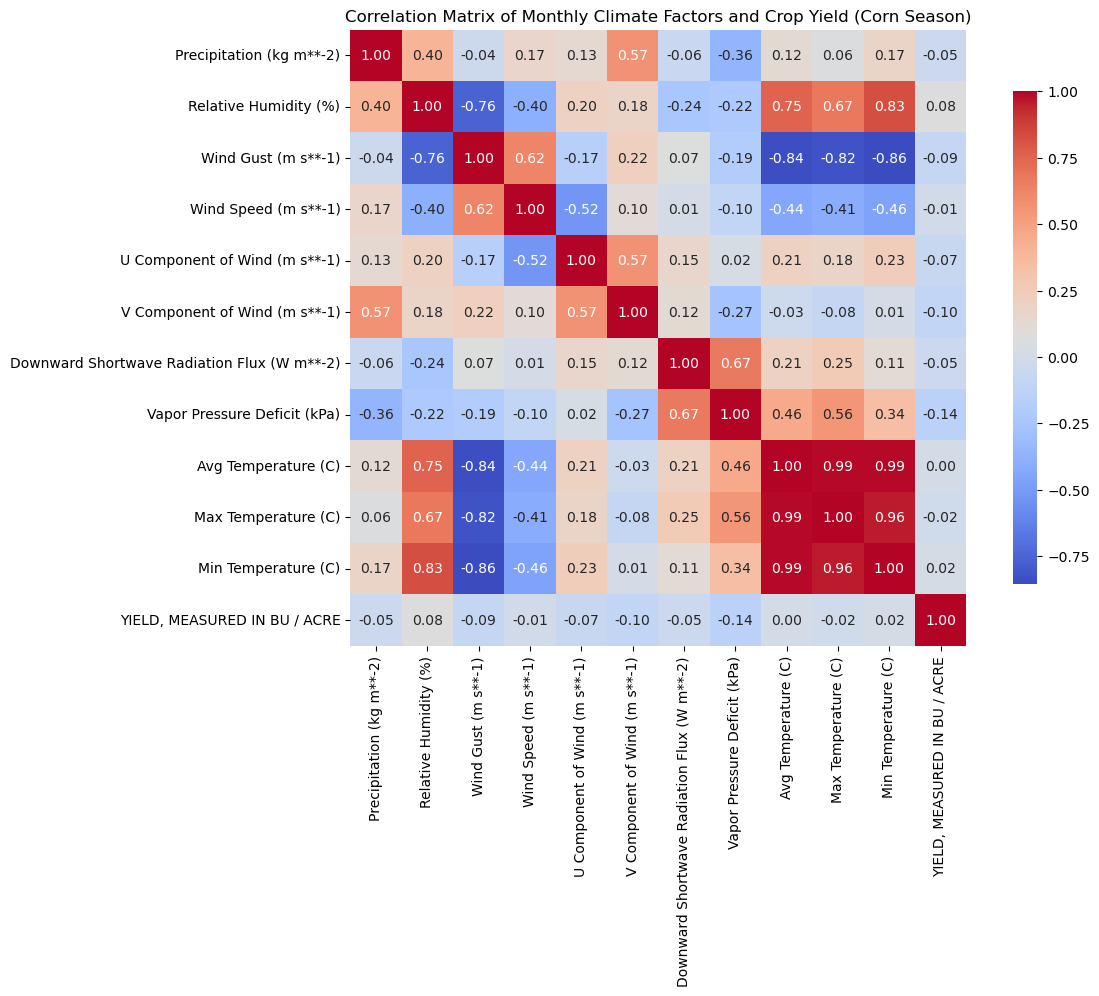

YIELD, MEASURED IN BU / ACRE                   1.000000
Relative Humidity (%)                          0.078570
Min Temperature (C)                            0.021024
Avg Temperature (C)                            0.000909
Wind Speed (m s**-1)                          -0.013428
Max Temperature (C)                           -0.020130
Precipitation (kg m**-2)                      -0.046218
Downward Shortwave Radiation Flux (W m**-2)   -0.050715
U Component of Wind (m s**-1)                 -0.068375
Wind Gust (m s**-1)                           -0.085068
V Component of Wind (m s**-1)                 -0.097091
Vapor Pressure Deficit (kPa)                  -0.139409
Name: YIELD, MEASURED IN BU / ACRE, dtype: float64


In [133]:
# Define corn growing season months (April=4 to September=9)
corn_season = (hrrr_every_month_df["Date"].dt.month >= 4) & (hrrr_every_month_df["Date"].dt.month <= 9)
hrrr_corn_season_df = hrrr_every_month_df[corn_season].copy()

# Merge HRRR monthly data (corn season only) with USDA corn data by FIPS
merged_monthly_corn_season_df = hrrr_corn_season_df.merge(
    usda_corn_df[["FIPS", "YIELD, MEASURED IN BU / ACRE"]],
    on="FIPS",
    how="left"
)
merged_monthly_corn_season_df_clean = merged_monthly_corn_season_df.dropna()

# Only include numeric columns in the correlation matrix
monthly_corn_season_numeric_df = merged_monthly_corn_season_df_clean.select_dtypes(include=["number"])

# Compute correlation matrix
monthly_corn_season_corr_matrix = monthly_corn_season_numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_corn_season_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix of Monthly Climate Factors and Crop Yield (Corn Season)")
plt.show()

monthly_corn_season_yield_corr = monthly_corn_season_corr_matrix["YIELD, MEASURED IN BU / ACRE"].sort_values(ascending=False)
print(monthly_corn_season_yield_corr)

In [134]:
# --- Derived Indicators for Each County in the Growing Season ---

# 1. Growing Degree Days (GDD)
BASE_TEMP = 10  # °C, common for corn and many crops

# Calculate GDD for each day in growing season
growing_df["GDD"] = (growing_df["Avg Temperature (C)"] - BASE_TEMP).clip(lower=0)

# 2. Rainfall Variability (std dev of daily rainfall)
rainfall_variability = growing_df.groupby(["FIPS", "County"])["Precipitation (kg m**-2)"].std().reset_index()
rainfall_variability = rainfall_variability.rename(columns={"Precipitation (kg m**-2)": "Rainfall_Variability"})

# 3. Heat Stress Index: max consecutive days above 33°C (per county)
def max_consecutive_heat_days(df, temp_col="Max Temperature (C)", threshold=33):
    df = df.sort_values("Date")
    is_hot = df[temp_col] > threshold
    # Find consecutive True runs
    max_streak = streak = 0
    for hot in is_hot:
        if hot:
            streak += 1
            max_streak = max(max_streak, streak)
        else:
            streak = 0
    return max_streak

heat_stress = (
    growing_df.groupby(["FIPS", "County"])
    .apply(lambda df: max_consecutive_heat_days(df, "Max Temperature (C)", 33))
    .reset_index(name="Max_Consecutive_Heat_Days")
)

# 4. Drought Periods: max consecutive days with <1mm rain (per county)
def max_consecutive_drought_days(df, rain_col="Precipitation (kg m**-2)", threshold=1.0):
    df = df.sort_values("Date")
    is_dry = df[rain_col] < threshold
    max_streak = streak = 0
    for dry in is_dry:
        if dry:
            streak += 1
            max_streak = max(max_streak, streak)
        else:
            streak = 0
    return max_streak

drought_periods = (
    growing_df.groupby(["FIPS", "County"])
    .apply(lambda df: max_consecutive_drought_days(df, "Precipitation (kg m**-2)", 1.0))
    .reset_index(name="Max_Consecutive_Drought_Days")
)

# 5. Total GDD for growing season (per county)
gdd_total = growing_df.groupby(["FIPS", "County"])["GDD"].sum().reset_index().rename(columns={"GDD": "Total_GDD"})

# --- Merge all derived indicators into growing_stats ---
growing_stats = (
    growing_stats
    .merge(gdd_total, on=["FIPS", "County"], how="left")
    .merge(rainfall_variability, on=["FIPS", "County"], how="left")
    .merge(heat_stress, on=["FIPS", "County"], how="left")
    .merge(drought_periods, on=["FIPS", "County"], how="left")
)

growing_stats

/var/folders/xq/dt50_bnd53sdn1lb28kpb16r0000gp/T/ipykernel_1992/2907558717.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda df: max_consecutive_heat_days(df, "Max Temperature (C)", 33))
/var/folders/xq/dt50_bnd53sdn1lb28kpb16r0000gp/T/ipykernel_1992/2907558717.py:48: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda df: max_consecutive_drought_days(df, "Precipitation (kg m**-2)",

FIPS      County  Avg_Growing_Season_Temp  Cumulative_Rainfall  Hot_Days  \
0   01003     BALDWIN                25.110061           793.066197         4   
1   01005     BARBOUR                24.302341           356.166900        12   
2   01009      BLOUNT                23.087842           369.884357         3   
3   01015     CALHOUN                22.783162           454.133400         0   
4   01019    CHEROKEE                22.682649           385.721000         2   
5   01021     CHILTON                23.534579           405.121042         5   
6   01031      COFFEE                24.475884           434.657312         8   
7   01033     COLBERT                23.417817           432.052478        17   
8   01043     CULLMAN                23.087924           400.632957         4   
9   01045        DALE                24.475002           422.661250         8   
10  01047      DALLAS                24.273418           586.748237        15   
11  01049      DEKALB                21.890057           395.788103         0   
12  01053    ESCAMBIA                24.530566           650.282700         8   
13  01055      ETOWAH                22.670573           365.254667         1   
14  01057     FAYETTE                23.720591           469.735286        10   
15  01067       HENRY                24.222855           354.650167         9   
16  01069     HOUSTON                24.577063           392.279583        13   
17  01071     JACKSON                22.201100           401.488286         1   
18  01077  LAUDERDALE                23.113055           403.818500        10   
19  01079    LAWRENCE                23.226943           364.859850        15   
20  01083   LIMESTONE                23.022651           364.588067        10   
21  01089     MADISON                22.836331           365.036300         3   
22  01091     MARENGO                24.338294           653.897690        15   
23  01093      MARION                23.065189           488.004636         4   
24  01095    MARSHALL                22.733012           332.520174         1   
25  01099      MONROE                24.448186           584.868333        15   
26  01103      MORGAN                23.148617           340.708400         7   
27  01105       PERRY                24.208206           620.094333        13   
28  01111    RANDOLPH                22.539054           413.729000         0   
29  01113     RUSSELL                24.232278           459.742600        12   
30  01121   TALLADEGA                22.976161           541.143138         0   
31  01125  TUSCALOOSA                24.076098           496.214500        14   

    Cold_Days  Days_Without_Rain    Total_GDD  Rainfall_Variability  \
0           5                 28  2765.141197              8.135326   
1          12                 41  2617.328467              4.407741   
2          16                 58  2396.772321              5.373978   
3          16                 63  2340.486050              6.447046   
4          18                 57  2322.986143              6.366306   
5          12                 54  2477.695667              6.091138   
6          10                 50  2649.086688              5.631541   
7          21                 71  2457.987000              5.864264   
8          17                 66  2397.175652              5.754386   
9          10                 51  2648.925333              5.215032   
10         12                 53  2612.035474              8.930744   
11         16                 55  2181.918655              6.475748   
12          9                 42  2659.093650              8.192394   
13         17                 66  2320.249556              5.102691   
14         18                 63  2511.617714              6.454710   
15         11                 56  2602.782417              4.986446   
16          9                 48  2667.602500              4.897626   
17         16                 48  2239.455229        

In [135]:
from scipy.stats import zscore

# --- Feature Engineering for USDA Corn Data ---


# 1. Crop Yield (Target) is already present as 'YIELD, MEASURED IN BU / ACRE'

# 2. Normalized Yield: z-score within Alabama (state-level normalization)
usda_corn_df["Yield_ZScore"] = zscore(usda_corn_df["YIELD, MEASURED IN BU / ACRE"])

# 3. Region Encoding: categorical codes for county and state
usda_corn_df["County_Code"] = usda_corn_df["county_name"].astype("category").cat.codes
usda_corn_df["State_Code"] = usda_corn_df["state_name"].astype("category").cat.codes

# 4. Soil Type Proxy: use historical average yield per county (if multi-year data available)
# If only 2022 is available, use 2022 yield as proxy (otherwise, group by county and average)
if usda_corn_df["year"].nunique() > 1:
    soil_proxy = usda_corn_df.groupby("county_name")["YIELD, MEASURED IN BU / ACRE"].mean().rename("Soil_Proxy_Yield")
    usda_corn_df = usda_corn_df.merge(soil_proxy, on="county_name", how="left")
else:
    usda_corn_df["Soil_Proxy_Yield"] = usda_corn_df["YIELD, MEASURED IN BU / ACRE"]

# 5. Previous Year Yield: lag feature if time-series data is available
if usda_corn_df["year"].nunique() > 1:
    usda_corn_df = usda_corn_df.sort_values(["county_name", "year"])
    usda_corn_df["Prev_Year_Yield"] = usda_corn_df.groupby("county_name")["YIELD, MEASURED IN BU / ACRE"].shift(1)
else:
    usda_corn_df["Prev_Year_Yield"] = None

usda_corn_df

commodity_desc reference_period_desc  year state_name county_name  \
0            CORN                  YEAR  2022    ALABAMA     BALDWIN   
1            CORN                  YEAR  2022    ALABAMA     BARBOUR   
2            CORN                  YEAR  2022    ALABAMA      BLOUNT   
3            CORN                  YEAR  2022    ALABAMA     CALHOUN   
4            CORN                  YEAR  2022    ALABAMA    CHEROKEE   
5            CORN                  YEAR  2022    ALABAMA     CHILTON   
6            CORN                  YEAR  2022    ALABAMA      COFFEE   
7            CORN                  YEAR  2022    ALABAMA     COLBERT   
8            CORN                  YEAR  2022    ALABAMA     CULLMAN   
9            CORN                  YEAR  2022    ALABAMA        DALE   
10           CORN                  YEAR  2022    ALABAMA      DALLAS   
11           CORN                  YEAR  2022    ALABAMA     DE KALB   
12           CORN                  YEAR  2022    ALABAMA    ESCAMBIA   
13           CORN                  YEAR  2022    ALABAMA      ETOWAH   
14           CORN                  YEAR  2022    ALABAMA     FAYETTE   
15           CORN                  YEAR  2022    ALABAMA       HENRY   
16           CORN                  YEAR  2022    ALABAMA     HOUSTON   
17           CORN                  YEAR  2022    ALABAMA     JACKSON   
18           CORN                  YEAR  2022    ALABAMA  LAUDERDALE   
19           CORN                  YEAR  2022    ALABAMA    LAWRENCE   
20           CORN                  YEAR  2022    ALABAMA   LIMESTONE   
21           CORN                  YEAR  2022    ALABAMA     MADISON   
22           CORN                  YEAR  2022    ALABAMA     MARENGO   
23           CORN                  YEAR  2022    ALABAMA      MARION   
24           CORN                  YEAR  2022    ALABAMA    MARSHALL   
25           CORN                  YEAR  2022    ALABAMA      MONROE   
26           CORN                  YEAR  2022    ALABAMA      MORGAN   
27           CORN                  YEAR  2022    ALABAMA       PERRY   
28           CORN                  YEAR  2022    ALABAMA    RANDOLPH   
29           CORN                  YEAR  2022    ALABAMA     RUSSELL   
30           CORN                  YEAR  2022    ALABAMA   TALLADEGA   
31           CORN                  YEAR  2022    ALABAMA  TUSCALOOSA   

    asd_code                     asd_desc domain_desc source_desc  \
0         50  COASTAL PLAINS & GULF COAST       TOTAL      SURVEY   
1         60                    WIREGRASS       TOTAL      SURVEY   
2         20   MOUNTAINS & EASTERN VALLEY       TOTAL      SURVEY   
3         20   MOUNTAINS & EASTERN VALLEY       TOTAL      SURVEY   
4         20   MOUNTAINS & EASTERN VALLEY       TOTAL      SURVEY   
5         30      UPPER PLAINS & PIEDMONT       TOTAL      SURVEY   
6         60                    WIREGRASS       TOTAL      SURVEY   
7         10              NORTHERN VALLEY       TOTAL      SURVEY   
8         20   MOUNTAINS & EASTERN VALLEY       TOTAL      SURVEY   
9         60                    WIREGRASS       TOTAL      SURVEY   
10        40                   BLACK BELT       TOTAL      SURVEY   
11        20   MOUNTAINS & EASTERN VALLEY       TOTAL      SURVEY   
12        50  COASTAL PLAINS & GULF COAST       TOTAL      SURVEY   
13        20   MOUNTAINS & EASTERN VALLEY       TOTAL      SURVEY   
14        30      UPPER PLAINS & PIEDMONT       TOTAL      SURVEY   
15        60                    WIREGRASS       TOTAL      SURVEY   
16        60                    WIREGRASS       TOTAL      SURVEY   
17        20   MOUNTAINS & EASTERN VALLEY       TOTAL      SURVEY   
18        10              NORTHERN VALLEY       TOTAL      SURVEY   
19        10              NORTHERN VALLEY       TOTAL      SURVEY   
20        10              NORTHERN VALLEY       TOTAL      SURVEY   
21        10              NORTHERN VALLEY       TOTAL      SURVEY   
22        40                   BLACK BE

292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Train MSE: 429.19170184807734
Train MAE: 17.143452333669142
Train R2: 0.43034677402397725
Test MSE: 459.4053153444627
Test MAE: 17.840761506067565
Test R2: 0.37517037633597206


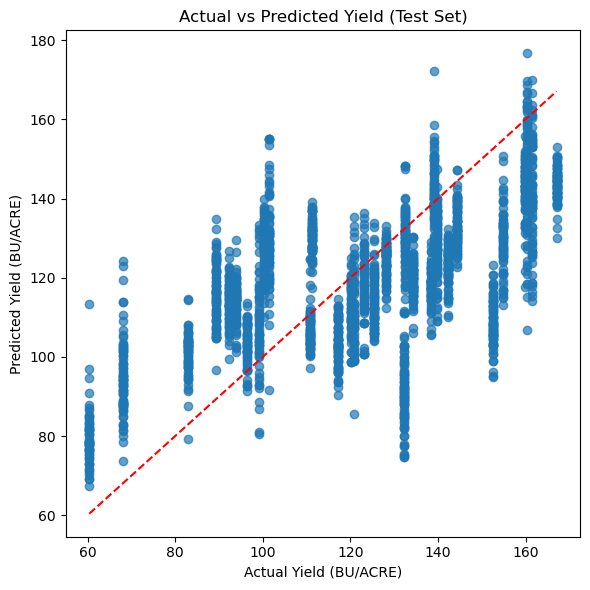

In [140]:

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# --- 1. Select features and target ---
features = [
    'Relative Humidity (%)',
    'Min Temperature (C)',
    'Avg Temperature (C)',
    'Precipitation (kg m**-2)',
    'Wind Speed (m s**-1)',
    'Max Temperature (C)',
    'Downward Shortwave Radiation Flux (W m**-2)',
    'U Component of Wind (m s**-1)',
    'V Component of Wind (m s**-1)',
    'Wind Gust (m s**-1)',
    'Vapor Pressure Deficit (kPa)',
    'County',  # Categorical feature
]
target = 'YIELD, MEASURED IN BU / ACRE'

# --- 2. Prepare X and y ---
X = merged_df_clean[features].copy()
y = merged_df_clean[target].copy()

# --- 3. Encode categorical features ---
le_county = LabelEncoder()
X['County'] = le_county.fit_transform(X['County'])

# --- 4. Normalize numerical features ---
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[X.columns.difference(['County'])] = scaler.fit_transform(X[X.columns.difference(['County'])])

# --- 5. Check multicollinearity (remove highly correlated features) ---
corr_matrix = X_scaled.corr().abs()
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
X_scaled = X_scaled.drop(columns=to_drop)

# --- 6. Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# --- 7. Baseline model: simple MLP with TensorFlow ---
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=16,
    verbose=0
)

# --- 8. Evaluate model ---
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_train_pred = model.predict(X_train).flatten()
y_test_pred = model.predict(X_test).flatten()

print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Train R2:", r2_score(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Test R2:", r2_score(y_test, y_test_pred))

# --- 9. Plot actual vs predicted ---
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Yield (BU/ACRE)')
plt.ylabel('Predicted Yield (BU/ACRE)')
plt.title('Actual vs Predicted Yield (Test Set)')
plt.tight_layout()
plt.show()